# Credit Score Classification

#### Problem Statement

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

Given a person’s credit-related information, build a machine learning model that can classify the credit score.

### 1. Importing the libraries

A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [110]:
### Data Wrangling

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Modelling

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

### Tabulating the results

from tabulate import tabulate

### Model Validation

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

### 2. Importing the data

In this section, I will fetch the training and test datasets that are available in the Kaggle's project description in the Data section.

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each customer. Your model will be based on “features” like customer’s age and occupation. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each customer. It is your job to predict these outcomes. For each customer in the test set, use the model you trained to predict the bracket of their credit score (Poor, Standard, Good).

In [111]:
### Fetching the dataset

dataset = pd.read_csv("train.csv")

In [112]:
### Looking at the sample data in the dataset

dataset.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [113]:
### Shape of the dataset

dataset.shape

(100000, 28)

The dataset consists of 28 columns and 100000 rows.

### 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here, we will perform EDA on the categorical columns of the dataset -  and the numerical columns of the dataset -

#### 3.1 Datatypes, Missing Data, and Summary Statistics

In [114]:
### Looking at the datatypes of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Here, the columns - Month, Occupation, Type_of_Loan, Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour, Credit_Score are categorical. Hence, we modify the datatypes of these columns to category.

In [115]:
### Changing the datatype of the above mentioned columns to category

dataset.Month = dataset.Month.astype('category')
dataset.Occupation = dataset.Occupation.astype('category')
dataset.Type_of_Loan = dataset.Type_of_Loan.astype('category')
dataset.Credit_Mix = dataset.Credit_Mix.astype('category')
dataset.Payment_of_Min_Amount = dataset.Payment_of_Min_Amount.astype('category')
dataset.Payment_Behaviour = dataset.Payment_Behaviour.astype('category')
dataset.Credit_Score = dataset.Credit_Score.astype('category')

Looking at the modified datatypes of the columns in both the datasets.

In [116]:
### Looking at the modified datatypes of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  object  
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  object  
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              8859

From the above data, we can see that there are a few columns that have an improper datatype. The columns - Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance are object datatyped but they should be a number datatype like int or float.

Now, we will make sure that we will change the datatype of these columns from object to a numerical datatype like int or float.

In [117]:
### A function to remove the '_' in the data

def removeUnderscore(value):
    first_index = 0
    last_index = len(value) - 1
    while first_index <= last_index:
        if value[first_index] == '_':
            first_index += 1
        if value[last_index] == '_':
            last_index -= 1
        if '_' not in value[first_index : last_index + 1]:
            if value[first_index : last_index + 1] == '':
                return 0
            else:
                return value[first_index : last_index + 1]


def modifyData(columns):
    for each_column in columns:
        data = [str(value) for value in list(dataset[each_column])]
        new_data = []
        for value in data:
            if value == 'nan':
                new_data.append(float('nan'))
            else:
                new_data.append(float(removeUnderscore(value)))

        dataset[each_column] = new_data

modifyData(['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Changed_Credit_Limit',
           'Amount_invested_monthly', 'Monthly_Balance'])

Now, we have removed all the underscores (_) in the data. Now, let's look at the datatypes of the columns in the datasets, focusing on the columns we have changed in the above cell.

In [118]:
### Looking at the datatypes of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  float64 
 13  Type_of_Loan              8859

From the above data, we can see that that the datatype of the columns - Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, Monthly_Balance have changed from Object to Float. We also see that there are missing values in the dataset. Now, lets look at the columns that have missing values.

In [119]:
### Missing data by columns in the dataset

dataset.isnull().sum().sort_values(ascending = False)

,0
Monthly_Inhand_Salary,15002
Type_of_Loan,11408
Name,9985
Credit_History_Age,9030
Num_of_Delayed_Payment,7002
Amount_invested_monthly,4479
Num_Credit_Inquiries,1965
Monthly_Balance,1200
Month,0
Age,0


From the above data, we can see that there are missing values in the columns - Monthly_Inhand_Salary, Type_of_Loan, Name, Credit_History_Age, Num_of_Delayed_Payment, Amount_invested_monthly, Num_Credit_Inquiries, Monthly_Balance. Now, lets look where these missing values are present in these columns i.e., whether these values are clustered at a single place or scattered in the data.

<Axes: >

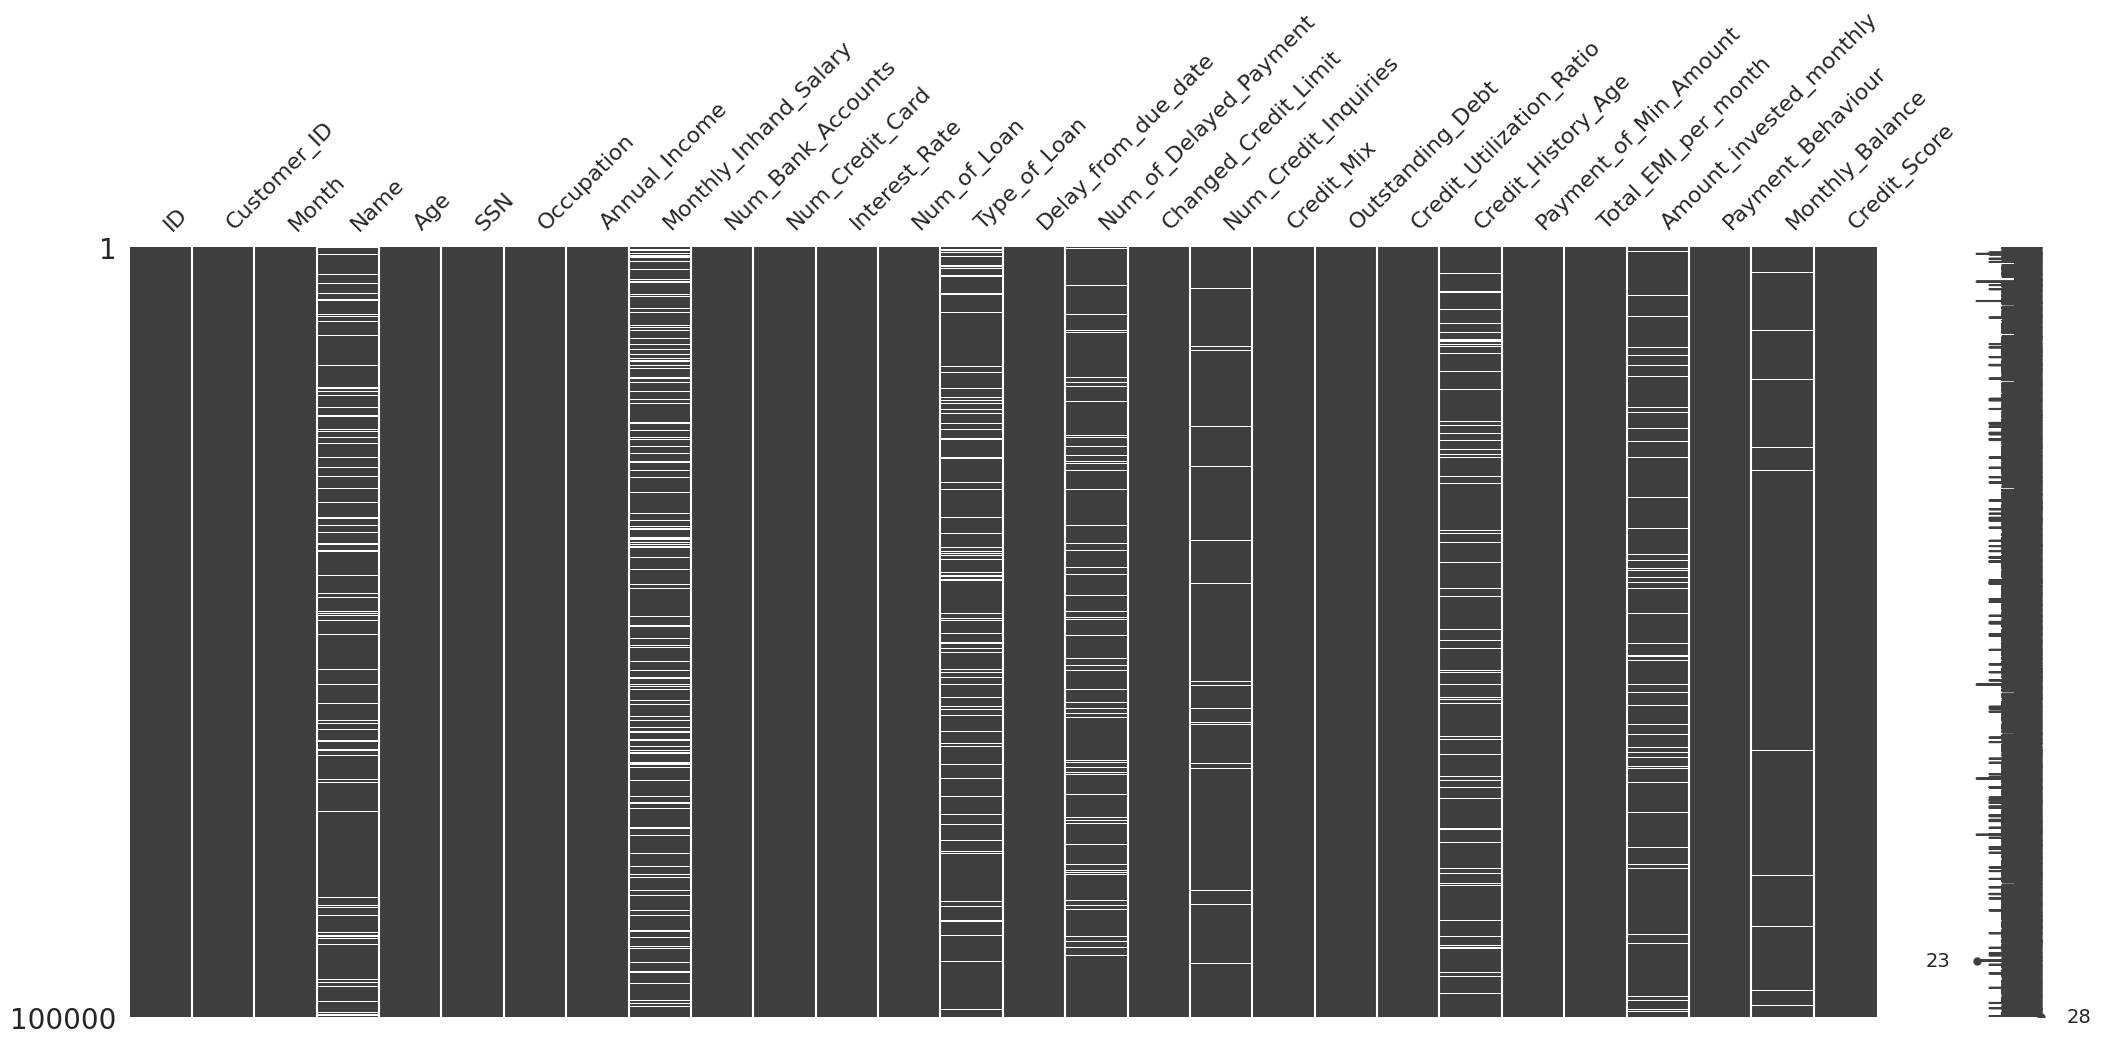

In [120]:
### Visual representation of the missing data in the dataset

missingno.matrix(dataset)

From the above data, we can see that the missing values in the data are scattered, not clustered at a single place.

In [121]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.171791,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.880628,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,4.970000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.250000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.660000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


From the above summary statistics, we can see that there are outliers present in the data. We will take care of these in the next sections.

#### 3.2 Feature Analysis

##### 3.2.1 Categorical variable - Occupation

In [122]:
### Value counts of the column - Occupation

occupation_count = dataset['Occupation'].value_counts(dropna = False)
occupation_count

,count
Occupation,
_______,7062
Lawyer,6575
Architect,6355
Engineer,6350
Scientist,6299
Mechanic,6291
Accountant,6271
Developer,6235
Media_Manager,6232


Text(0.5, 0, 'Occupation')

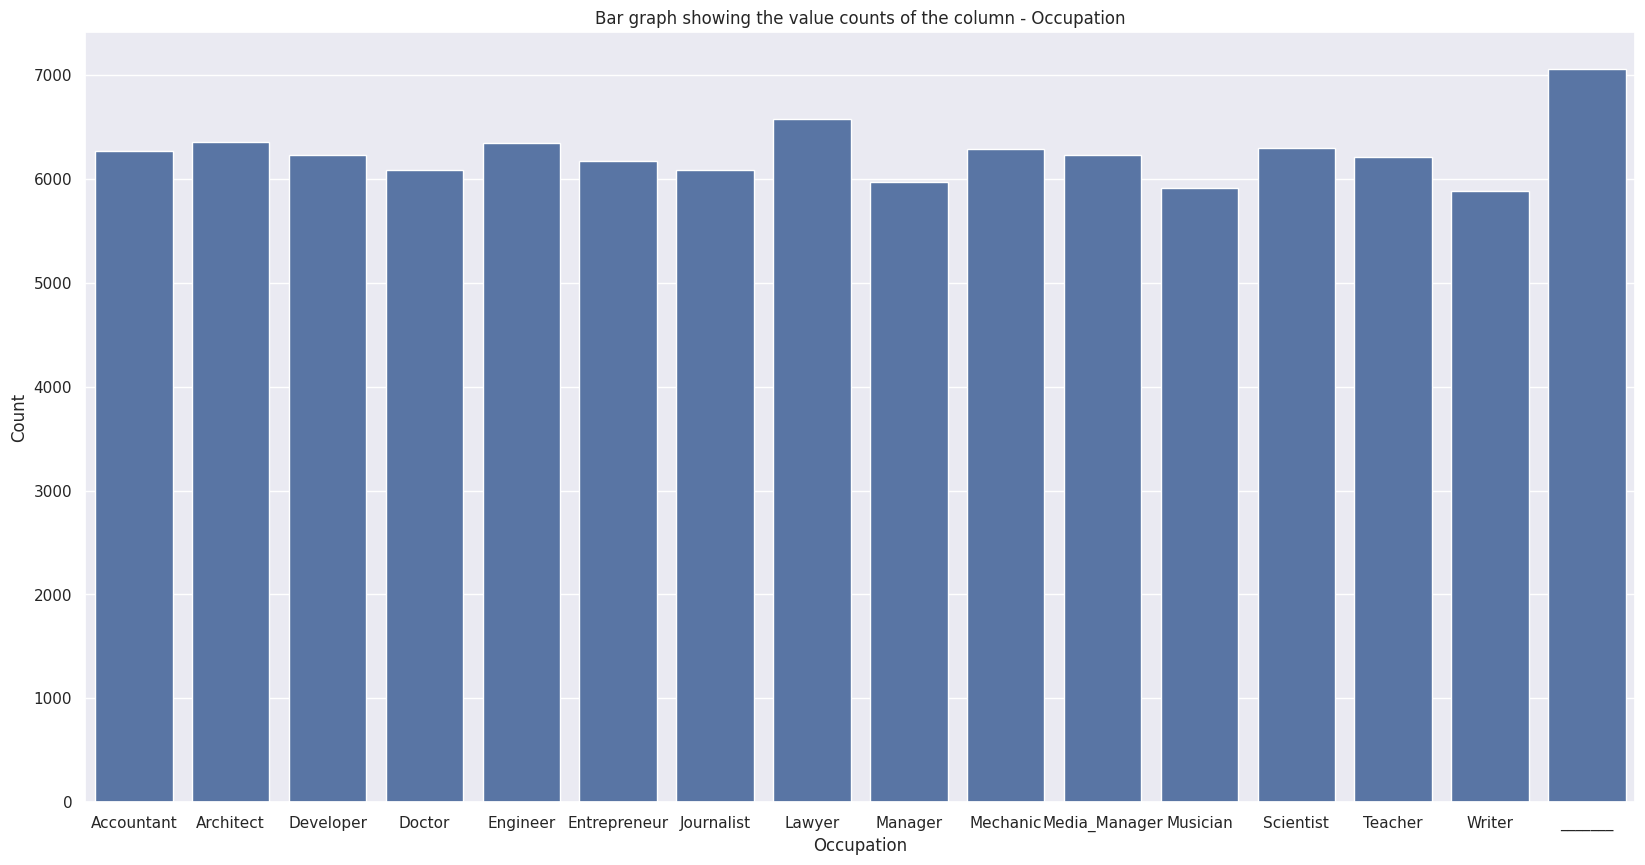

In [123]:
### Bar graph showing the value counts of the column - Occupation

sns.set(rc = {'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Occupation', fontsize = 12)

From the above graph, we can see that most of the jobs are 'unnamed'.

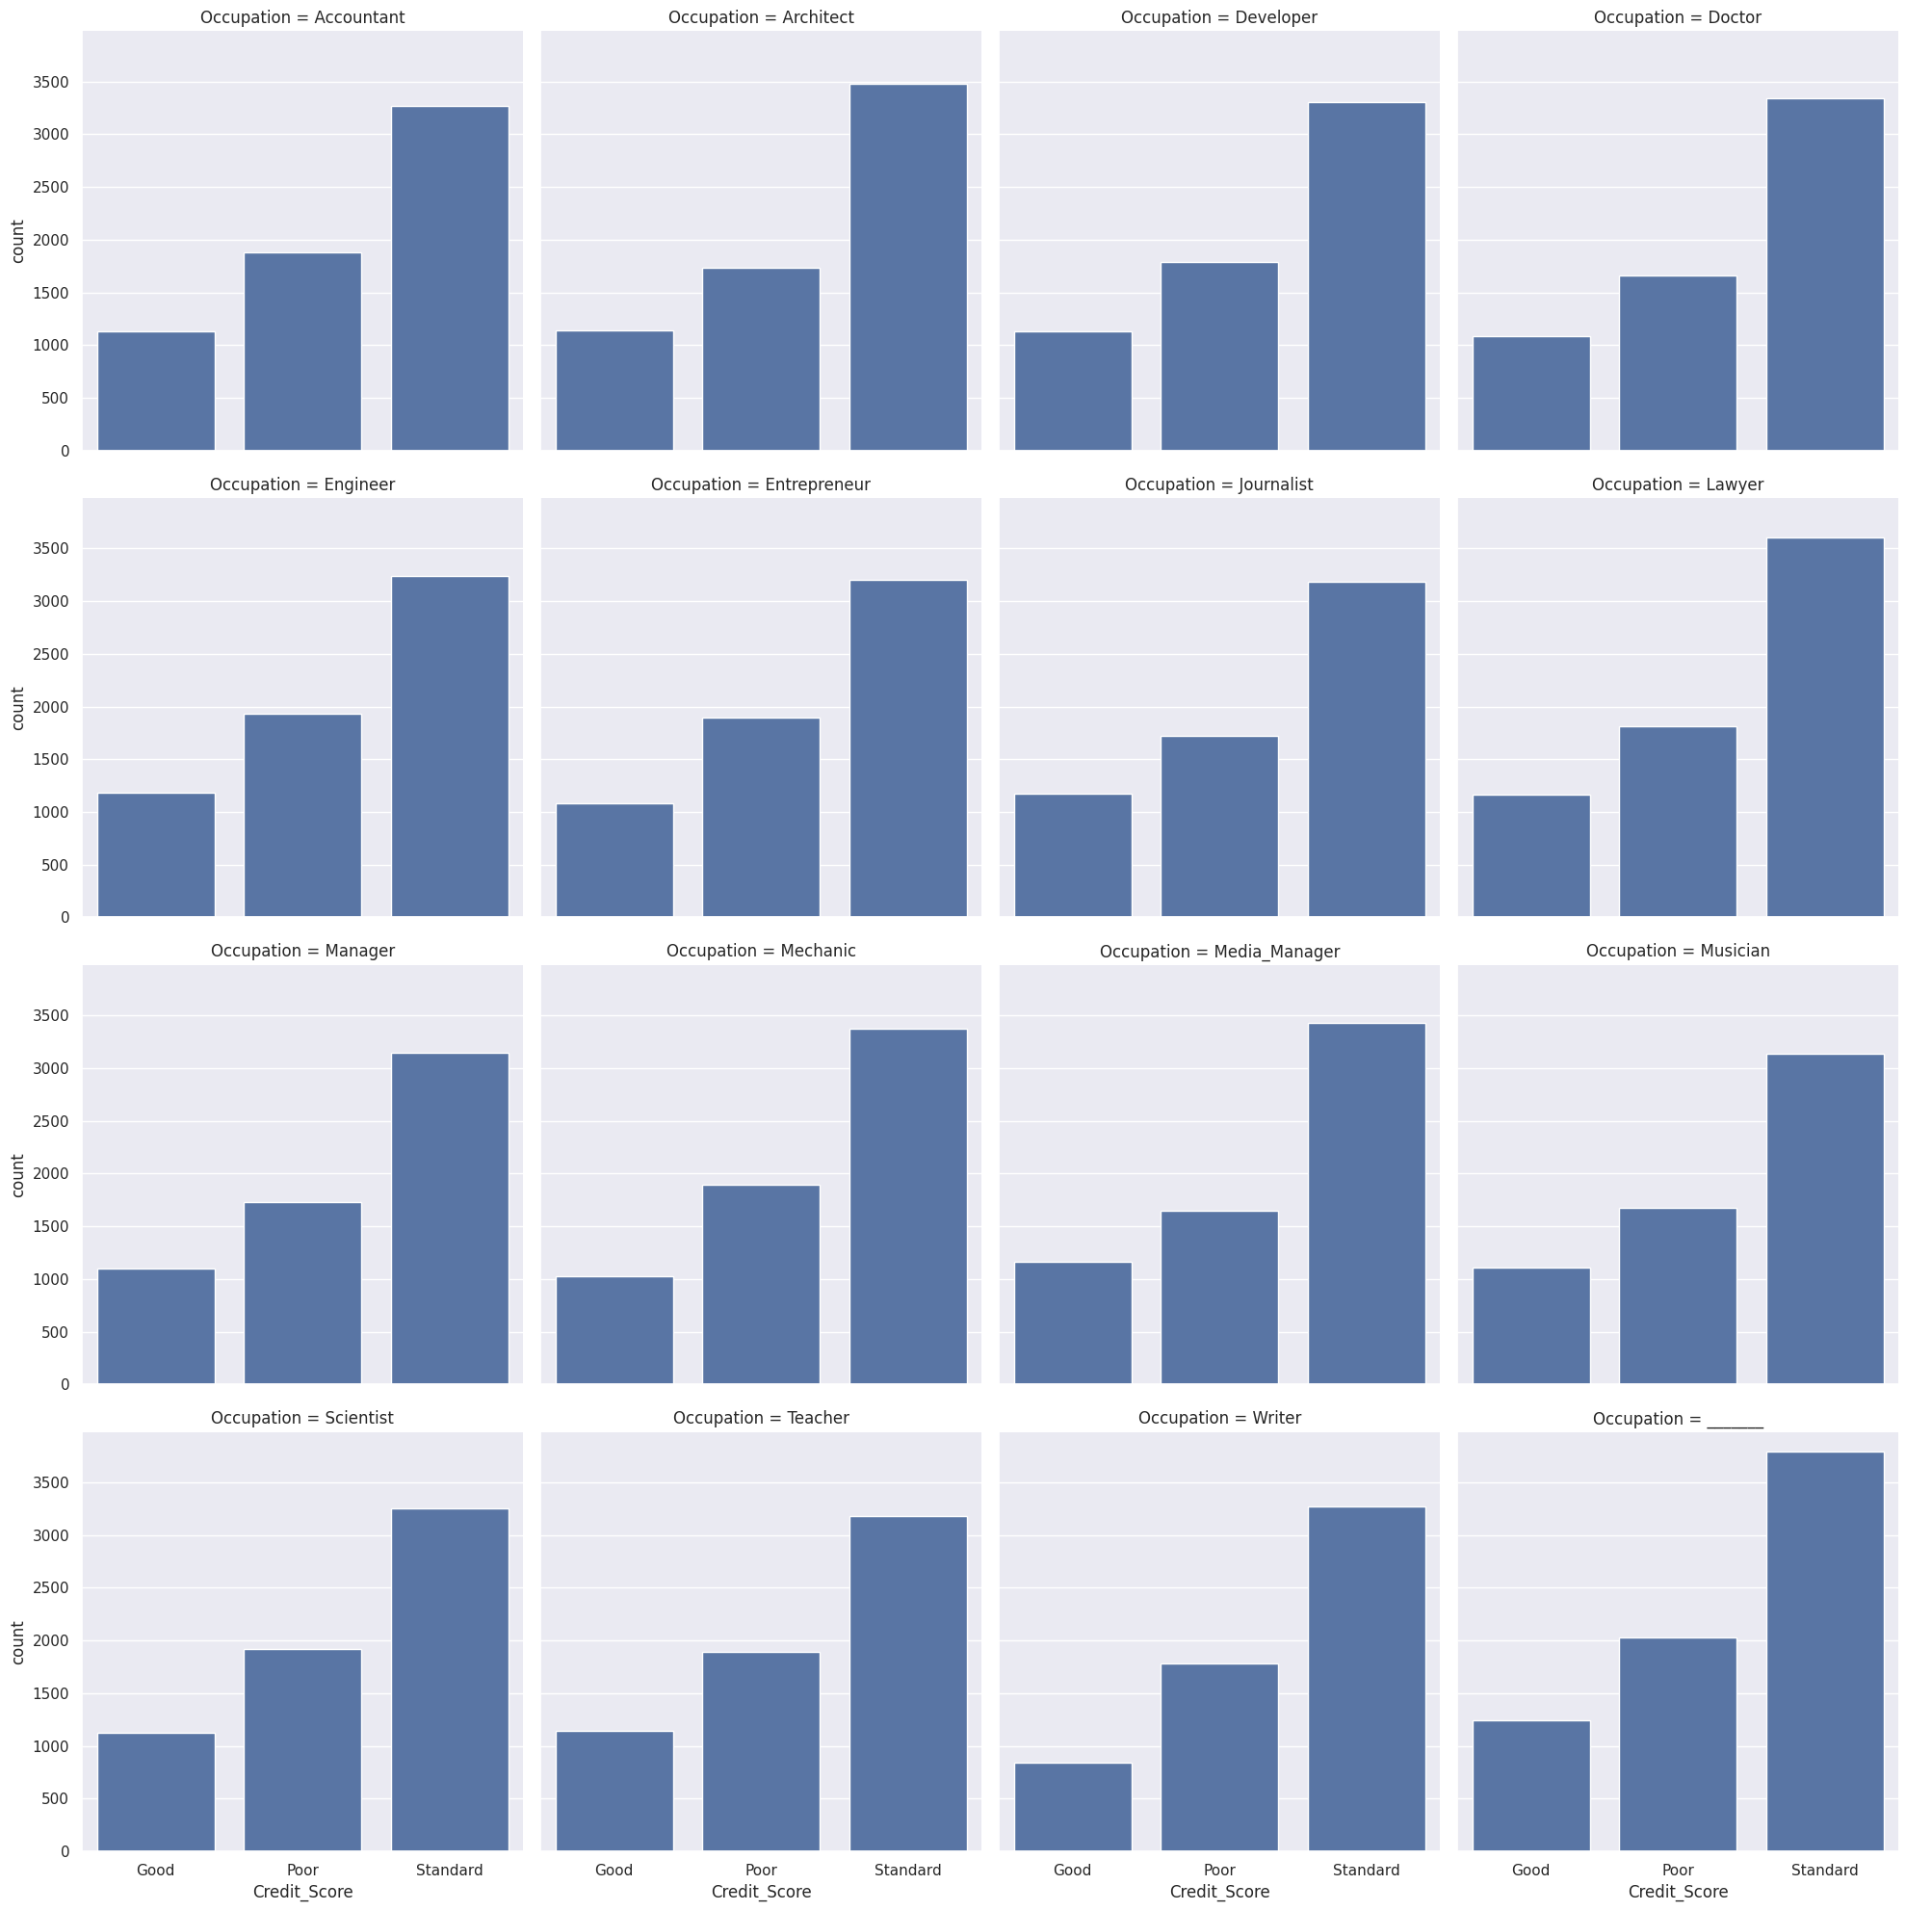

In [124]:
### Distribution of Credit_Score for each Occupation

sns.catplot(x = 'Credit_Score', col = 'Occupation', data = dataset, kind = 'count', col_wrap = 4)

From the above graphs, we can see that most of the people have a Credit Score in the Standard range for all the Occupations.

##### 3.2.2 Categorical variable - Type of Loan

In [125]:
### Fetching the not null data of the column - Type of Data

index_values = ~dataset['Type_of_Loan'].isnull().values
loan_type_data = list(dataset['Type_of_Loan'][index_values])
loan_type_data

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan,

In [126]:
### Create a dictionary to store the counts of all the various loan types

loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

Text(0.5, 0, 'Type_of_Loan')

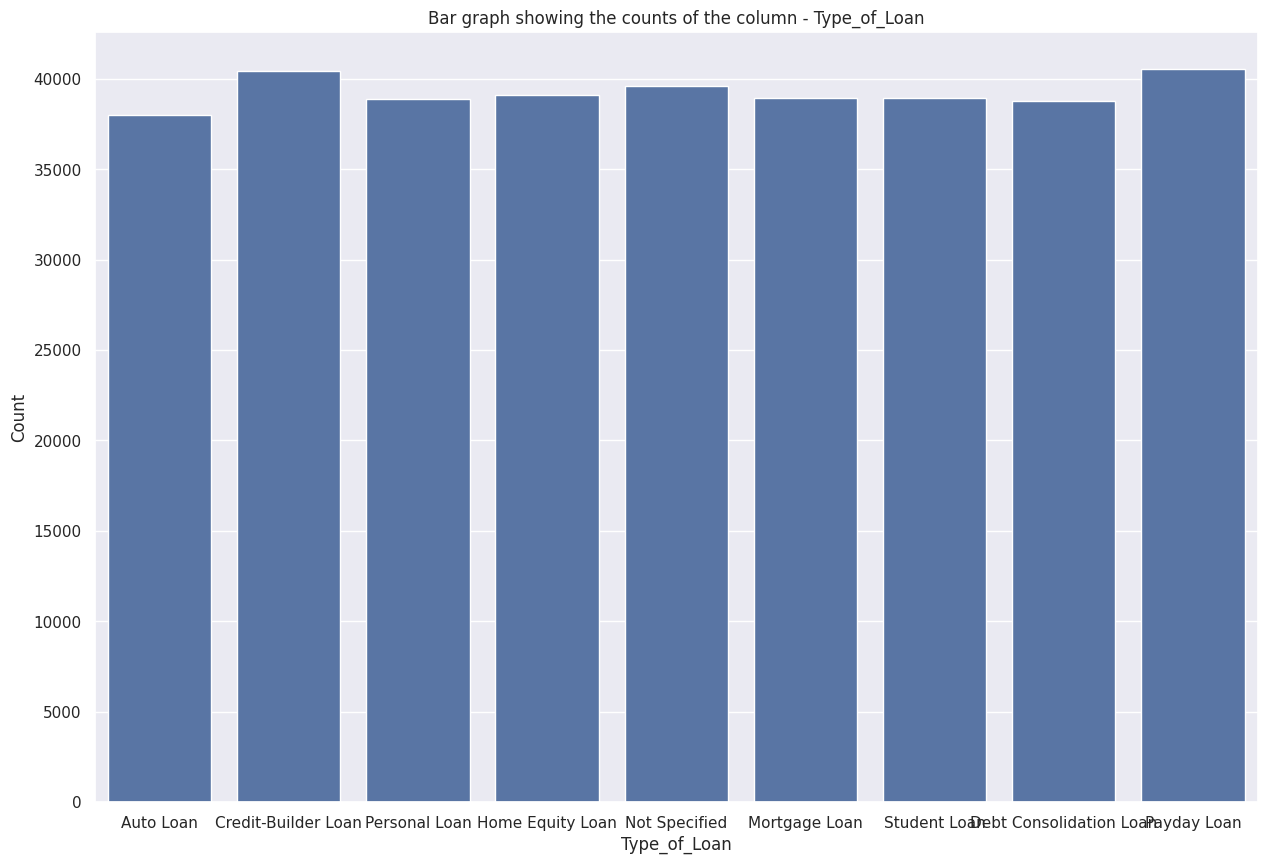

In [127]:
### Bar graph showing the counts of the column - Type_of_Loan

sns.set(rc = {'figure.figsize': (15, 10)})
sns.barplot(x=list(loan_type_dict.keys()), y=list(loan_type_dict.values()))
plt.title('Bar graph showing the counts of the column - Type_of_Loan')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Type_of_Loan', fontsize = 12)

From the above graph, we can see that the Payday Loans and Credit-Builder Loans are the highest occurrences of loans among all the other loans.

##### 3.2.3 Categorical variable - Credit_MIx

In [128]:
### Value counts of the column - Credit_Mix

credit_mix_count = dataset['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

,count
Credit_Mix,
Standard,36479
Good,24337
_,20195
Bad,18989


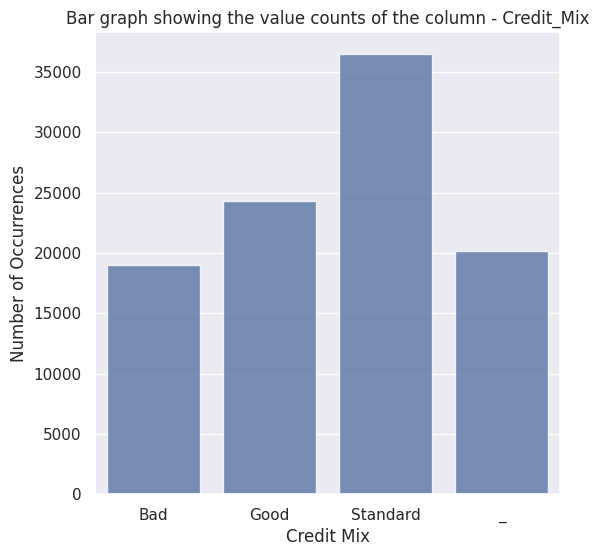

In [129]:
### Bar graph showing the value counts of the column - Credit_Mix

sns.set(rc = {'figure.figsize': (6, 6)})
sns.barplot(x=credit_mix_count.index, y=credit_mix_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Credit Mix', fontsize = 12)
plt.show()

From the above graph, we can see that most of the customers have a 'Standard' credit mix.

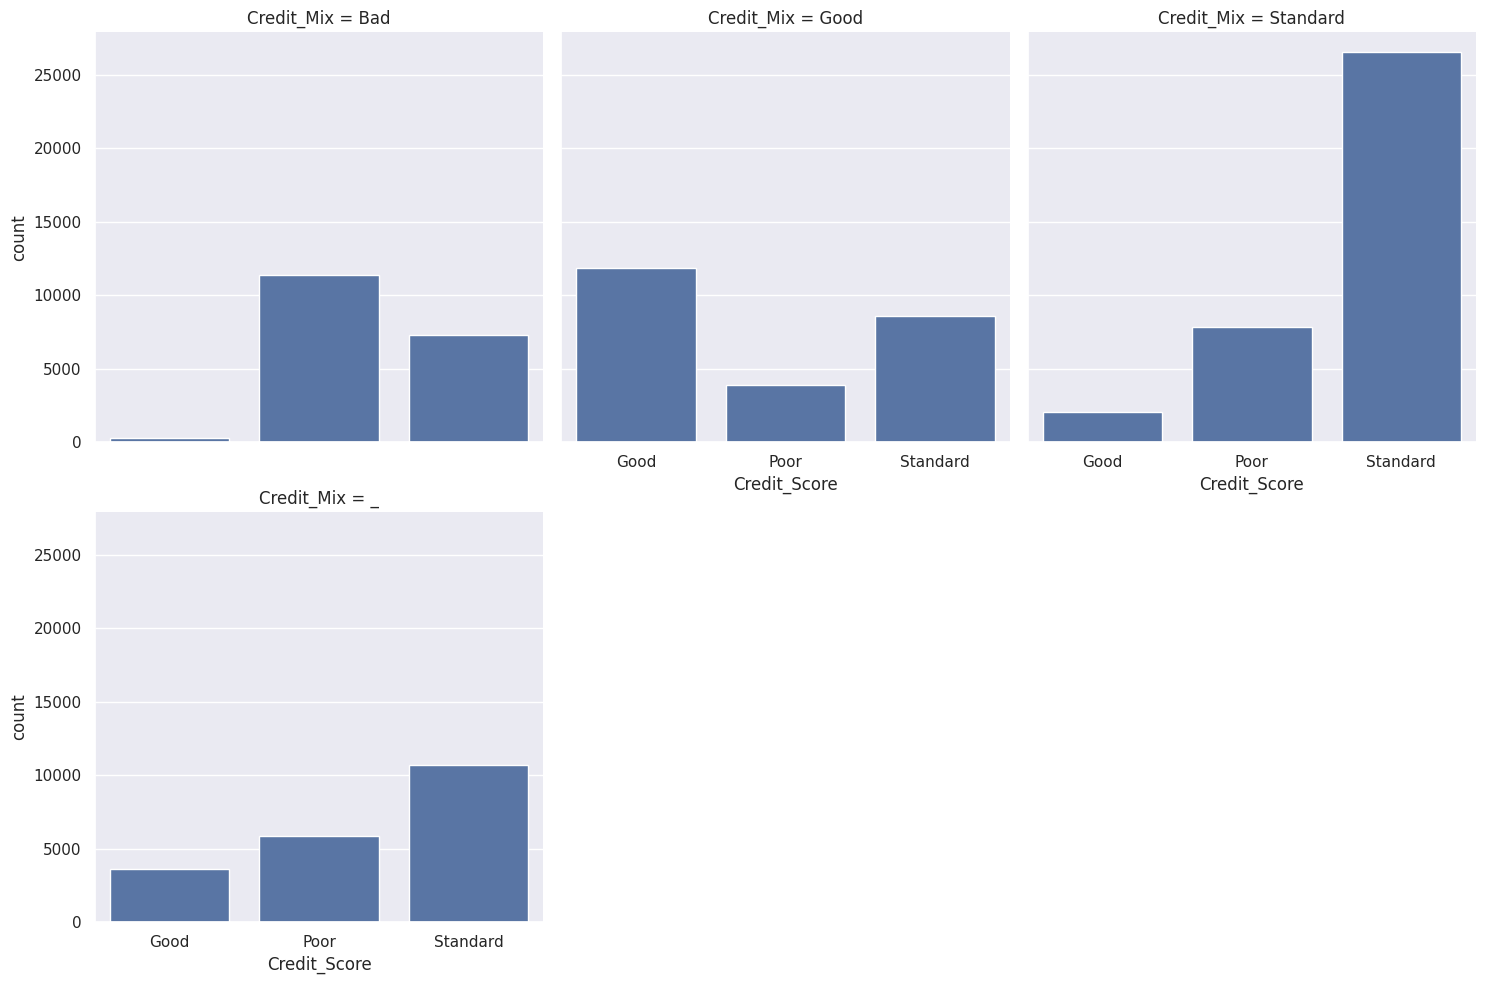

In [130]:
### Distribution of Credit_Score for each Credit_Mix

sns.catplot(x = 'Credit_Score', col = 'Credit_Mix', data = dataset, kind = 'count', col_wrap = 3)

From the above graphs, we can see that the columns - Credit_Mix and Credit_Score are almost similar.

##### 3.2.4 Categorical variable - Payment_of_Min_Amount

In [131]:
### Value counts of the column - Payment_of_Min_Amount

min_amount_count = dataset['Payment_of_Min_Amount'].value_counts(dropna = False)
min_amount_count

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


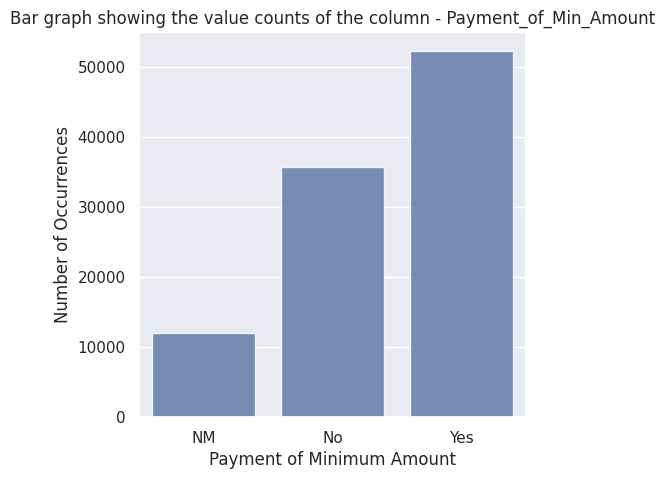

In [132]:
### Bar graph showing the value counts of the column - Payment_of_Min_Amount

sns.set(rc = {'figure.figsize': (5, 5)})
sns.barplot(x=min_amount_count.index, y=min_amount_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Payment_of_Min_Amount')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Payment of Minimum Amount', fontsize = 12)
plt.show()

From the above graph, we can see that most of the customer's paid a minimum amount for their loans.

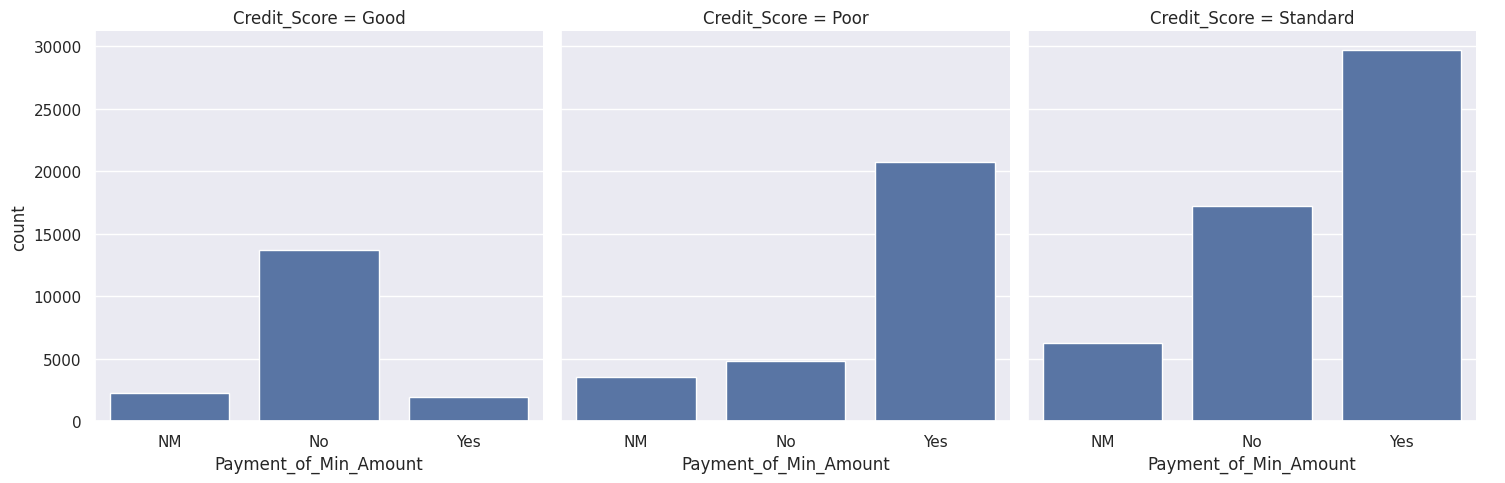

In [133]:
### Distribution of Payment_of_Min_Amount for each Credit Score

sns.catplot(x = 'Payment_of_Min_Amount', col = 'Credit_Score', data = dataset, kind = 'count', col_wrap = 3)

From the above graphs, we can see that the most of the customers with a good credit score didn't pay the minimum amount for the loan. Similarly, customers with a poor credit score paid the minimum amount for the loan.

##### 3.2.5 Numerical variable - Age

Text(0.5, 1.0, 'Customer Age Distribution')

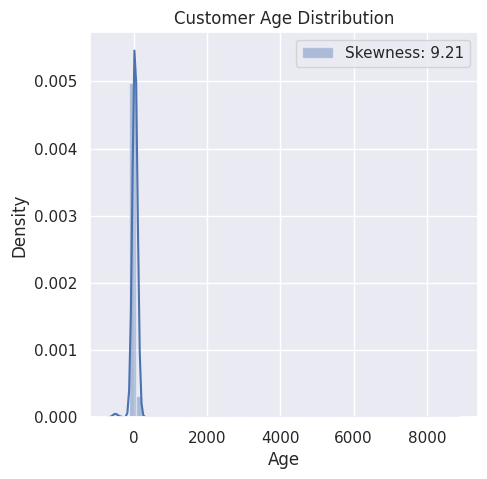

In [134]:
### Understanding the distribution of the column - Age

sns.distplot(dataset['Age'], label = 'Skewness: %.2f'%(dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

From the above graph, we can see that the above graph has a high degree of skewness.

##### 3.2.6 Numerical variable - Monthly_Inhand_Salary

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

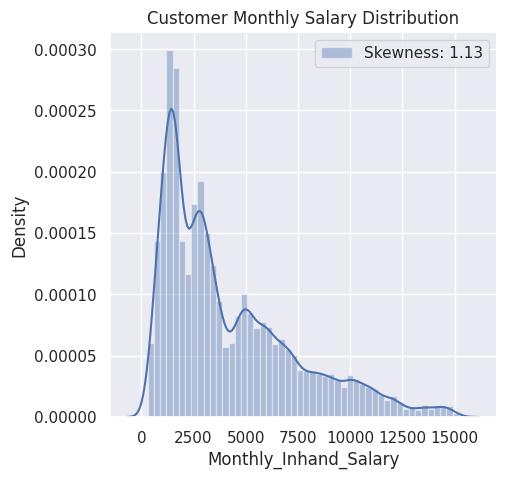

In [135]:
### Understanding the distribution of the column - Monthly_Inhand_Salary

sns.distplot(dataset['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(dataset['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

From the above graph, we can see that the distribution is right skewed and has a slight degree of skewness.

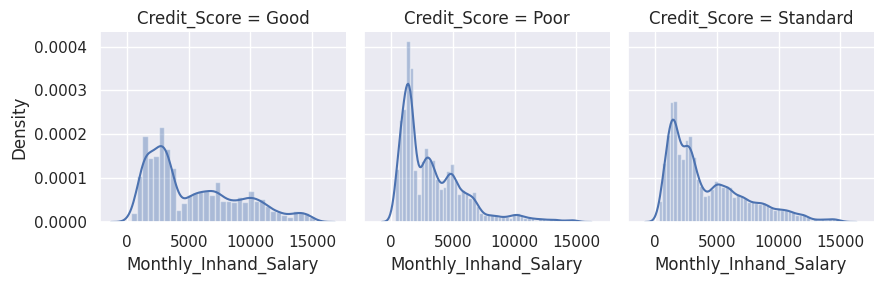

In [136]:
### Monthly Inhand Salary distribution by Credit Score

grid = sns.FacetGrid(dataset, col = 'Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')

Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

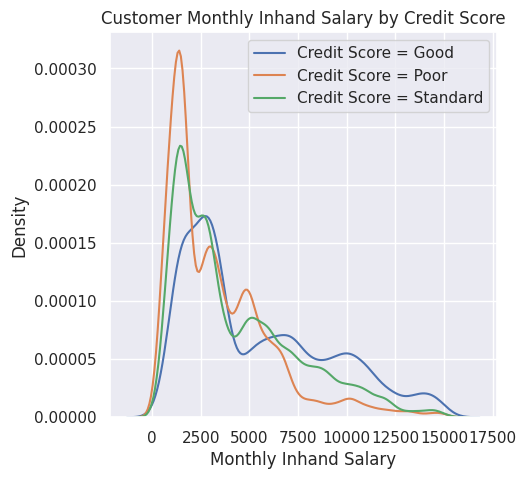

In [137]:
### Merging the above graphs into one

sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

From the above graph, we can see that most of the customer's who have a Poor credit score have a low monthly inhand salary than compared to the customer's who have a Standard and a Good credit score.

##### 3.2.7 Numerical variable - Interest_Rate

Text(0.5, 1.0, 'Customers Interest Rate Distribution')

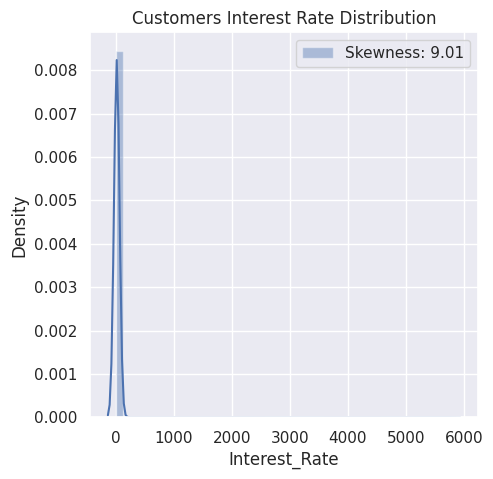

In [138]:
### Understanding the distribution of the column - Interest_Rate

sns.distplot(dataset['Interest_Rate'], label = 'Skewness: %.2f'%(dataset['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Customers Interest Rate Distribution')

From the above graph, we can see that the above graph has a high degree of skewness.

##### 3.2.8 Numerical variable - Outstanding_Debt

Text(0.5, 1.0, "Customer's Outstanding Debt  Distribution")

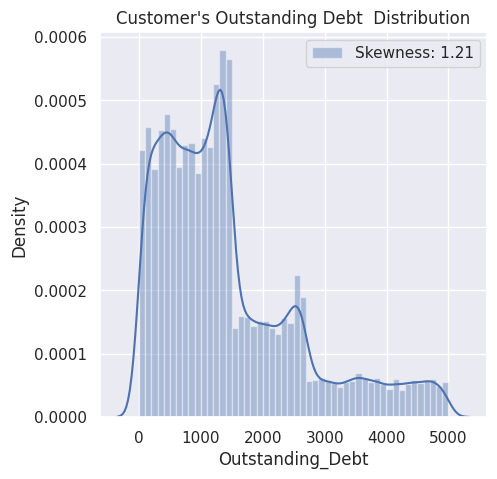

In [139]:
### Understanding the distribution of the column - Outstanding_Debt

sns.distplot(dataset['Outstanding_Debt'], label = 'Skewness: %.2f'%(dataset['Outstanding_Debt'].skew()))
plt.legend(loc = 'best')
plt.title("Customer's Outstanding Debt  Distribution")

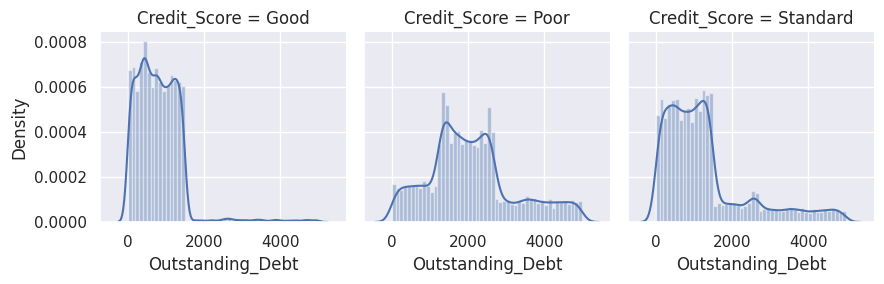

In [140]:
### Outstanding Debt distribution by Credit Score

grid = sns.FacetGrid(dataset, col = 'Credit_Score')
grid.map(sns.distplot, 'Outstanding_Debt')

Text(0.5, 1.0, "Customer's Outstanding Debt by Credit Score")

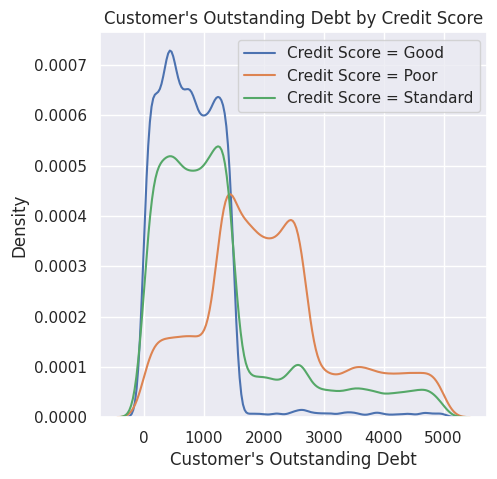

In [141]:
### Merging the above graphs into one

sns.kdeplot(dataset['Outstanding_Debt'][dataset['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(dataset['Outstanding_Debt'][dataset['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(dataset['Outstanding_Debt'][dataset['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel("Customer's Outstanding Debt")
plt.legend()
plt.title("Customer's Outstanding Debt by Credit Score")

From the above graph, we can see that customer's who have a Good credit score have very low outstanding debt than compared to the customer's who have Standard and Poor credit score.

### 4. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1. Detect and remove outliers in numerical variables
2. Drop and fill missing values
3. Feature engineering
4. Data trasformation
5. Feature encoding

#### 4.1 Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

Here, we will write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [142]:
def detect_outliers(df, n, features_list):
    outlier_indices = []
    for feature in features_list:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

numerical_columns = list(dataset.select_dtypes('number').columns)
print('Numerical columns: {}'.format(numerical_columns))
outliers_to_drop = detect_outliers(dataset, 2, numerical_columns)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Numerical columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
We will drop these 484 indices:  [1293, 2902, 3189, 3690, 7036, 7882, 8558, 8660, 9736, 9879, 10840, 12673, 13036, 13486, 15026, 17379, 17827, 18004, 18349, 20250, 20537, 20538, 22612, 24240, 24736, 25123, 25603, 25878, 25923, 27836, 27875, 28278, 30249, 31288, 31399, 31985, 33553, 34160, 34565, 34582, 35270, 35783, 36015, 36053, 36855, 36985, 37534, 39169, 39393, 41557, 41749, 43050, 44633, 44634, 45410, 46737, 47961, 48455, 48536, 48794, 50233, 51828, 53352, 54009, 54030, 56161, 56166, 58772, 59049, 60088, 60659, 61146, 61938, 62054, 63816, 64165, 65928, 68449, 68810, 69041, 73756, 76155, 77767, 78865, 78900, 81038, 81041, 82992, 83102

Now let's look at the data present in the rows.

In [143]:
dataset.iloc[outliers_to_drop, :]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1293,0x1d93,CUS_0xb9ea,June,Aileen Wangy,2744.0,202-04-9323,Writer,9133.045,NaN,6,...,Bad,3035.88,36.669441,9 Years and 4 Months,Yes,77767.000000,48.454512,!@9#%8,269.053164,Good
2902,0x2700,CUS_0x67ff,July,Barlyni,7992.0,017-88-1687,Manager,82700.320,6625.693333,8,...,Bad,4659.60,39.950138,12 Years and 1 Months,Yes,392.114333,10000.000000,High_spent_Medium_value_payments,372.265534,Poor
3189,0x28af,CUS_0x3fa8,June,Kumarp,471.0,283-56-6375,Writer,177243.920,14526.326667,4,...,Good,488.95,37.041853,28 Years and 9 Months,NM,284.804197,485.387942,!@9#%8,942.440528,Standard
3690,0x2ba0,CUS_0x29b2,March,Martinnet,1170.0,626-80-0791,Media_Manager,59930.040,5207.170000,7,...,Bad,4474.29,32.303684,1 Years and 11 Months,Yes,156.596164,165.383895,High_spent_Medium_value_payments,448.736941,Standard
7036,0x3f3a,CUS_0x3949,May,Scotto,6520.0,908-89-0498,Musician,63353.680,5356.473333,9,...,Bad,4362.52,31.463332,1 Years and 2 Months,NM,390.451288,233.035327,Low_spent_Large_value_payments,182.160718,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96585,0x24bef,CUS_0xbe4d,February,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,Bad,4320.49,28.977497,5 Years and 4 Months,Yes,446.366715,118.788667,High_spent_Medium_value_payments,266.862618,Standard
96586,0x24bf0,CUS_0xbe4d,March,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,NaN,7,...,Bad,4320.49,24.809802,5 Years and 5 Months,Yes,446.366715,287.084007,Low_spent_Medium_value_payments,128.567278,Poor
96589,0x24bf3,CUS_0xbe4d,June,NaN,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,Bad,4320.49,29.395568,5 Years and 8 Months,Yes,446.366715,545.426595,Low_spent_Small_value_payments,NaN,Poor
96590,0x24bf4,CUS_0xbe4d,July,Breidthardtb,27.0,676-67-1298,Entrepreneur,71738.160,5820.180000,7,...,_,4320.49,26.766928,5 Years and 9 Months,Yes,446.366715,168.901072,High_spent_Medium_value_payments,216.750214,Poor


We will drop these rows from the dataset.

In [144]:
### Drop outliers and reset index

print("Before: {} rows".format(len(dataset)))
dataset = dataset.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(dataset)))

Before: 100000 rows
After: 99516 rows


In [145]:
### Lets look at the new dataset

dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99512,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99513,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99514,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


#### 4.2 Drop and fill missing values

Here, we will drop the columns - ID, Customer_ID, Name, SSN, Credit_Mix, Num_of_Loan, Credit_Utilization_Ratio, Credit_History_Age, Payment_Behavior, Annual_Income, Monthly_Balance, Num_Bank_Accounts, Num_Credit_Card from the datasets.

In [146]:
### Dropping the columns from the dataset

dataset.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_Mix', 'Num_of_Loan',
             'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_Behaviour',
             'Annual_Income', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card'], axis = 1, inplace = True)
dataset

,Month,Age,Occupation,Monthly_Inhand_Salary,Interest_Rate,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,January,23.0,Scientist,1824.843333,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,No,49.574949,80.415295,Good
1,February,23.0,Scientist,NaN,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,No,49.574949,118.280222,Good
2,March,-500.0,Scientist,NaN,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,0.00,4.0,809.98,No,49.574949,81.699521,Good
3,April,23.0,Scientist,NaN,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,No,49.574949,199.458074,Good
4,May,23.0,Scientist,1824.843333,3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,No,49.574949,41.420153,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,April,25.0,Mechanic,3359.415833,7,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,No,35.104023,60.971333,Poor
99512,May,25.0,Mechanic,3359.415833,7,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,No,35.104023,54.185950,Poor
99513,June,25.0,Mechanic,3359.415833,5729,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,No,35.104023,24.028477,Poor
99514,July,25.0,Mechanic,3359.415833,7,"Auto Loan, and Student Loan",20,NaN,11.50,3.0,502.38,No,35.104023,251.672582,Standard


In [147]:
### Looking at the missing values in the dataset

dataset.isnull().sum().sort_values(ascending = False)

,0
Monthly_Inhand_Salary,14931
Type_of_Loan,11392
Num_of_Delayed_Payment,6972
Amount_invested_monthly,4452
Num_Credit_Inquiries,1949
Occupation,0
Month,0
Delay_from_due_date,0
Interest_Rate,0
Age,0


From the above data, we can see that there are missing values in the columns - Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Amount_invested_monthly, Num_Credit_Inquiries. Here, we will focus on removing the missing values in the columns - Monthly_Inhand_Salary, Num_of_Delayed_Payment, Amount_invested_monthly, and Num_Credit_Inquiries. However, we will replace the missing values in the column - Type_of_Loan in the Feature Engineering section.

##### 4.2.1 Handling missing values - Monthly_Inhand_Salary

Here, for replacing the missing values in the column - Monthly_Inhand_Salary, we will use the column Credit_Score and find the mean of the salary based on the Credit Score.

In [148]:
### Finding the mean value of the column - Monthly_Inhand_Salary in the dataset using Credit_Score

salary_good_mean = np.mean(dataset[dataset['Credit_Score'] == 'Good']['Monthly_Inhand_Salary'])
salary_poor_mean = np.mean(dataset[dataset['Credit_Score'] == 'Poor']['Monthly_Inhand_Salary'])
salary_standard_mean = np.mean(dataset[dataset['Credit_Score'] == 'Standard']['Monthly_Inhand_Salary'])

(salary_good_mean, salary_poor_mean, salary_standard_mean)

(np.float64(5379.965723477946),
 np.float64(3371.847702514712),
 np.float64(4238.793604735071))

In [149]:
### Finding the indices of the rows where Monthly_Inhand_Salary is null

index_values = list(dataset['Monthly_Inhand_Salary'].isnull())
index_values

[False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 T

In [150]:
### Replacing the missing values in the column Monthly_Inhand_Salary using the decision logic

for index in range(len(dataset)):
    if index_values[index]:
        if dataset['Credit_Score'][index] == 'Good':
            dataset['Monthly_Inhand_Salary'][index] = salary_good_mean
        elif dataset['Credit_Score'][index] == 'Poor':
            dataset['Monthly_Inhand_Salary'][index] = salary_poor_mean
        else:
            dataset['Monthly_Inhand_Salary'][index] = salary_standard_mean

In [151]:
### Checking if there are any missing values of Monthly_Inhand_Salary in the dataset

dataset['Monthly_Inhand_Salary'].isnull().sum()

np.int64(0)

We replaced all the missing values present in the column - Monthly_Inhand_Salary.

##### 4.2.2 Handling missing values - Num_of_Delayed_Payment

Here, we will use the median to replace the missing values in the column - Num_of_Delayed_Payment.

In [152]:
### Finding the median value of the column - Num_of_Delayed_Payment in the dataset

payment_index = list(~dataset['Num_of_Delayed_Payment'].isnull())
median_payment = np.median(dataset['Num_of_Delayed_Payment'].loc[payment_index])
median_payment

np.float64(14.0)

In [153]:
### Replacing the missing values of the column - Num_of_Delayed_Payment in the dataset

dataset['Num_of_Delayed_Payment'].fillna(median_payment, inplace = True)

In [154]:
### Checking if there are any missing values of Num_of_Delayed_Payment in the dataset

dataset['Num_of_Delayed_Payment'].isnull().sum()

np.int64(0)

We replaced all the missing values present in the column - Num_of_Delayed_Payment.

##### 4.2.3 Handling missing values - Amount_invested_monthly

Here, we will use the median to replace the missing values in the column - Amount_invested_monthly.

In [155]:
### Finding the median value of the column - Amount_invested_monthly in the dataset

amount_index = list(~dataset['Amount_invested_monthly'].isnull())
median_amount = np.median(dataset['Amount_invested_monthly'].loc[amount_index])
median_amount

np.float64(135.91926936353195)

In [156]:
### Replacing the missing values of the column - Amount_invested_monthly in the dataset

dataset['Amount_invested_monthly'].fillna(median_amount, inplace = True)

In [157]:
### Checking if there are any missing values of Amount_invested_monthly in the dataset

dataset['Amount_invested_monthly'].isnull().sum()

np.int64(0)

We replaced all the missing values present in the column - Amount_invested_monthly.

##### 4.2.4 Handling missing values - Num_Credit_Inquiries

Here, we will use the median to replace the missing values in the column - Num_Credit_Inquiries.

In [158]:
### Finding the median value of the column - Num_Credit_Inquiries in the dataset

inquiries_index = list(~dataset['Num_Credit_Inquiries'].isnull())
median_inquiries = np.median(dataset['Num_Credit_Inquiries'].loc[inquiries_index])
median_inquiries

np.float64(6.0)

In [159]:
### Replacing the missing values of the column - Num_Credit_Inquiries in the dataset

dataset['Num_Credit_Inquiries'].fillna(median_inquiries, inplace = True)

In [160]:
### Checking if there are any missing values of Num_Credit_Inquiries in the dataset

dataset['Num_Credit_Inquiries'].isnull().sum()

np.int64(0)

We replaced all the missing values present in the column - Num_Credit_Inquiries.

In [161]:
### Looking if the dataset has any more missing values apart from Type_of_Loan

dataset.isnull().sum().sort_values(ascending = False)

,0
Type_of_Loan,11392
Age,0
Month,0
Occupation,0
Monthly_Inhand_Salary,0
Interest_Rate,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0


Since, there are no missing values in the data apart from the data in the column - Type_of_Loan (which we will deal in the Feature Engineering), we can proceed to perform Feature Engineering.

#### 4.3 Feature Engineering

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

Here, we focus on creating new columns for:

1. Individual columns for Type_of_Loan

##### 4.3.1 Individual columns for Type_of_Loan

Here, we will create 8 different columns using the loan_type_dict dictionary. Here, we will not consider the value Not Specified for the loan type.

In [162]:
### Looking at the loan_type_dict

loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

In [163]:
### Creating 8 different lists for each loan type

auto_loan = [0] * (len(dataset))
credit_builder_loan = [0] * (len(dataset))
personal_loan = [0] * (len(dataset))
home_equity_loan = [0] * (len(dataset))
mortgage_loan = [0] * (len(dataset))
student_loan = [0] * (len(dataset))
debt_consolidation_loan = [0] * (len(dataset))
payday_loan = [0] * (len(dataset))

In [164]:
### Using 0's and 1's if a customer has a particular loan

for index in range(len(loan_type_data)):
    ### For Auto Loan
    if 'Auto' in loan_type_data[index]:
        auto_loan[index] = 1

    ### For Credit Builder Loan
    if 'Credit-Builder' in loan_type_data[index]:
        credit_builder_loan[index] = 1

    ### For Personal Loan
    if 'Personal' in loan_type_data[index]:
        personal_loan[index] = 1

    ### For Home Equity Loan
    if 'Home' in loan_type_data[index]:
        home_equity_loan[index] = 1

    ### For Mortgage Loan
    if 'Mortgage' in loan_type_data[index]:
        mortgage_loan[index] = 1

    ### For Student Loan
    if 'Student' in loan_type_data[index]:
        student_loan[index] = 1

    ### For Debt Consolidation loan
    if 'Debt' in loan_type_data[index]:
        debt_consolidation_loan[index] = 1

    ### For Payday loan
    if 'Payday' in loan_type_data[index]:
        payday_loan[index] = 1

In [165]:
### Adding the new columns to the dataset

dataset['Auto_Loan'] = auto_loan
dataset['Credit_Builder_Loan'] = credit_builder_loan
dataset['Personal_Loan'] = personal_loan
dataset['Home_Enquity_Loan'] = home_equity_loan
dataset['Mortgage_Loan'] = mortgage_loan
dataset['Student_Loan'] = student_loan
dataset['Debt_Consolidation_Loan'] = debt_consolidation_loan
dataset['Payday_Loan'] = payday_loan

In [166]:
### Removing the column - Type_of_loan

dataset.drop(['Type_of_Loan'], axis = 1, inplace = True)

In [167]:
### Looking at the modified dataset

dataset

,Month,Age,Occupation,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,...,Amount_invested_monthly,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,January,23.0,Scientist,1824.843333,3,3,7.0,11.27,4.0,809.98,...,80.415295,Good,1,1,1,1,0,0,0,0
1,February,23.0,Scientist,5379.965723,3,-1,14.0,11.27,4.0,809.98,...,118.280222,Good,1,1,1,1,0,0,0,0
2,March,-500.0,Scientist,5379.965723,3,3,7.0,0.00,4.0,809.98,...,81.699521,Good,1,1,1,1,0,0,0,0
3,April,23.0,Scientist,5379.965723,3,5,4.0,6.27,4.0,809.98,...,199.458074,Good,1,1,1,1,0,0,0,0
4,May,23.0,Scientist,1824.843333,3,6,14.0,11.27,4.0,809.98,...,41.420153,Good,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,April,25.0,Mechanic,3359.415833,7,23,7.0,11.50,3.0,502.38,...,60.971333,Poor,0,0,0,0,0,0,0,0
99512,May,25.0,Mechanic,3359.415833,7,18,7.0,11.50,3.0,502.38,...,54.185950,Poor,0,0,0,0,0,0,0,0
99513,June,25.0,Mechanic,3359.415833,5729,27,6.0,11.50,3.0,502.38,...,24.028477,Poor,0,0,0,0,0,0,0,0
99514,July,25.0,Mechanic,3359.415833,7,20,14.0,11.50,3.0,502.38,...,251.672582,Standard,0,0,0,0,0,0,0,0


#### 4.4 Data Transformation

From the dataset, we can see that there is a lot of skewness in the numerical columns of the dataset. Here, we will focus on removing the skewness in the data using log transformation.

##### 4.4.1 Log Transforming the column - Age

Text(0.5, 1.0, 'Customer Age Distribution')

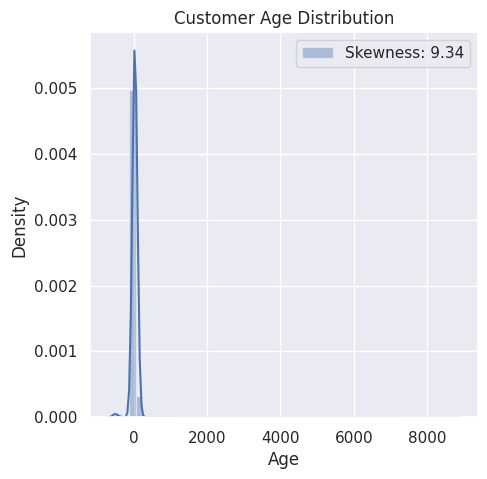

In [168]:
### Understanding the distribution of the column - Age

sns.distplot(dataset['Age'], label = 'Skewness: %.2f'%(dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

Text(0.5, 1.0, 'Customer Age Distribution')

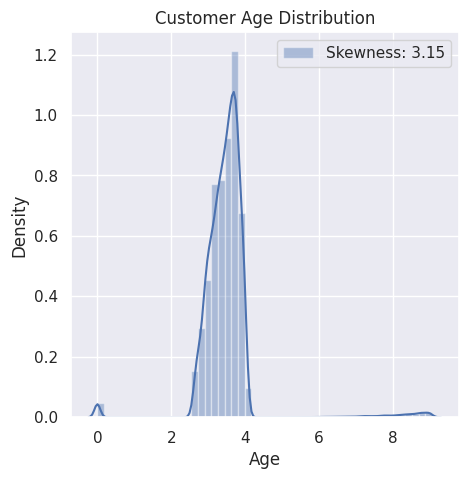

In [169]:
### Understanding the distribution of the data log(Age)

modified_age = [np.log(age) if age > 0 else 0 for age in dataset['Age']]
dataset['Age'] = modified_age

sns.distplot(dataset['Age'], label = 'Skewness: %.2f'%(dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.2  Log Transforming the column - Monthly_Inhand_Salary

Text(0.5, 1.0, 'Customer Monthly Inhand Salary Distribution')

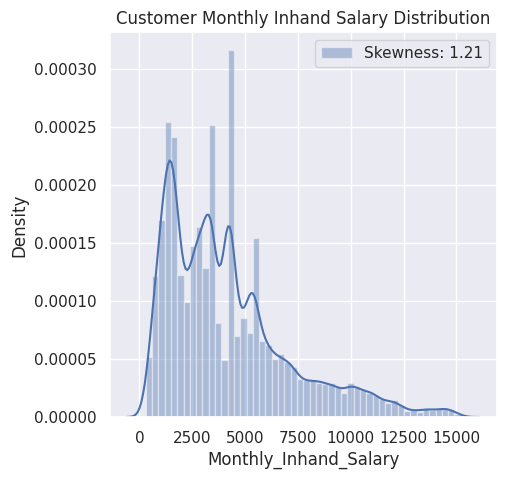

In [170]:
### Understanding the distribution of the column - Monthly_Inhand_Salary

sns.distplot(dataset['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(dataset['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')

Text(0.5, 1.0, 'Customer Monthly Inhand Salary Distribution')

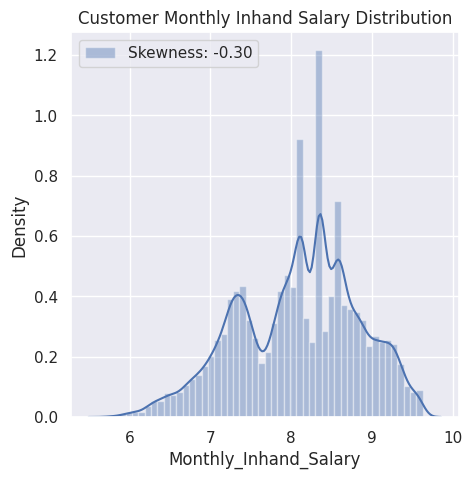

In [171]:
### Understanding the distribution of the data log(Monthly_Inhand_Salary)

modified_salary = [np.log(salary) if salary > 0 else 0 for salary in dataset['Monthly_Inhand_Salary']]
dataset['Monthly_Inhand_Salary'] = modified_salary

sns.distplot(dataset['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(dataset['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Inhand Salary Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.3 Log Transforming the column - Interest_Rate

Text(0.5, 1.0, 'Interest Rate Distribution')

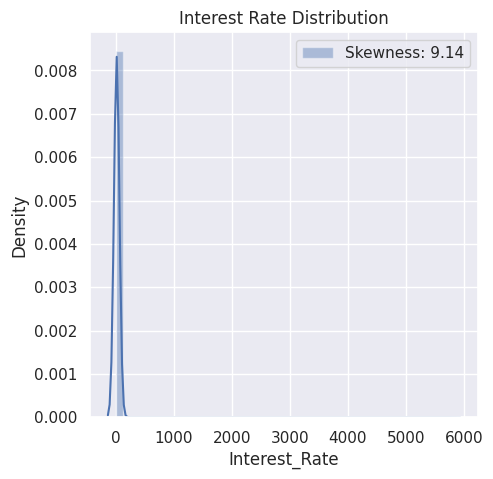

In [172]:
### Understanding the distribution of the column - Interest_Rate

sns.distplot(dataset['Interest_Rate'], label = 'Skewness: %.2f'%(dataset['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')

Text(0.5, 1.0, 'Interest Rate Distribution')

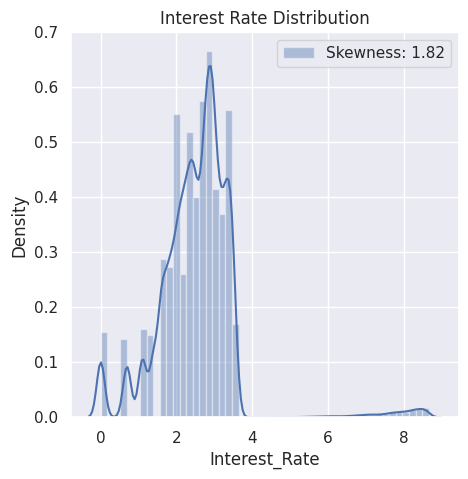

In [173]:
### Understanding the distribution of the data log(Interest_Rate)

modified_interest = [np.log(interest) if interest > 0 else 0 for interest in dataset['Interest_Rate']]
dataset['Interest_Rate'] = modified_interest

sns.distplot(dataset['Interest_Rate'], label = 'Skewness: %.2f'%(dataset['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Interest Rate Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.4 Log Transforming the column - Num_of_Delayed_Payment

Text(0.5, 1.0, 'Delayed Payment Distribution')

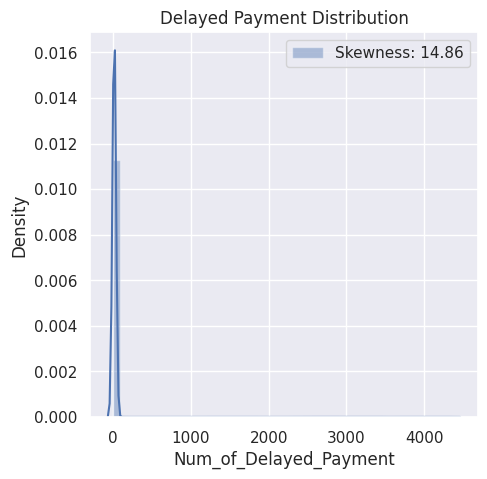

In [174]:
### Understanding the distribution of the column - Num_of_Delayed_Payment

sns.distplot(dataset['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(dataset['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')

Text(0.5, 1.0, 'Delayed Payment Distribution')

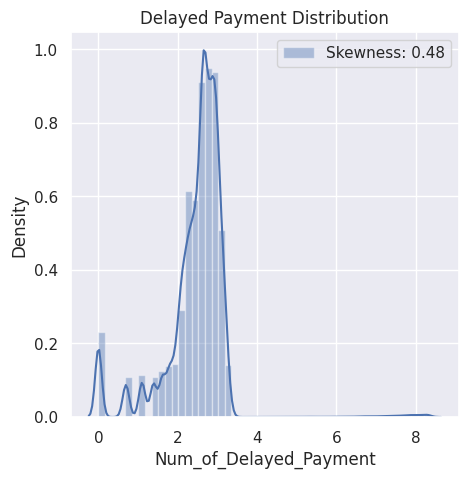

In [175]:
### Understanding the distribution of the data log(Num_of_Delayed_Payment)

modified_payment = [np.log(payment) if payment > 0 else 0 for payment in dataset['Num_of_Delayed_Payment']]
dataset['Num_of_Delayed_Payment'] = modified_payment

sns.distplot(dataset['Num_of_Delayed_Payment'], label = 'Skewness: %.2f'%(dataset['Num_of_Delayed_Payment'].skew()))
plt.legend(loc = 'best')
plt.title('Delayed Payment Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.5 Log Transforming the column - Num_Credit_Inquiries

Text(0.5, 1.0, 'Number of Credit Inquiries')

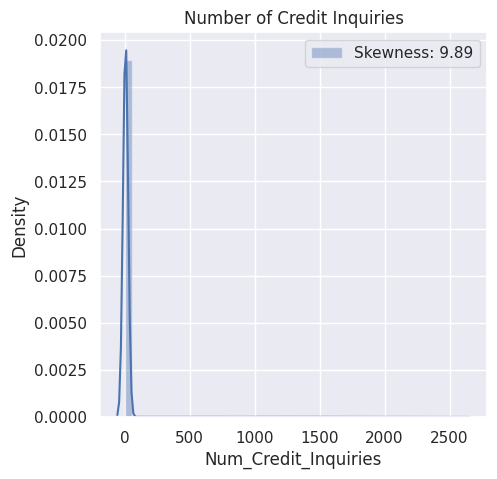

In [176]:
### Understanding the distribution of the column - Num_Credit_Inquiries

sns.distplot(dataset['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(dataset['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Number of Credit Inquiries')

Text(0.5, 1.0, 'Number of Credit Card Inquiries')

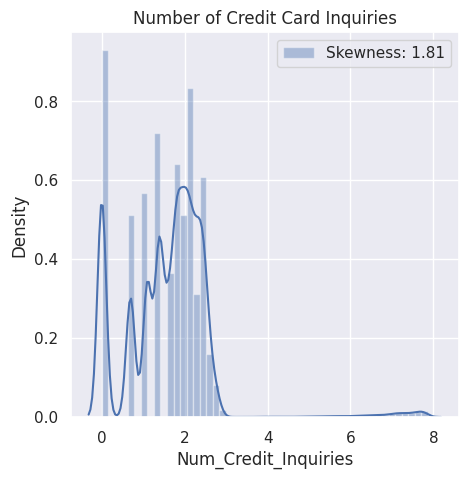

In [177]:
### Understanding the distribution of the data log(Num_Credit_Inquiries)

modified_inquiries = [np.log(inquiries) if inquiries > 0 else 0 for inquiries in dataset['Num_Credit_Inquiries']]
dataset['Num_Credit_Inquiries'] = modified_inquiries

sns.distplot(dataset['Num_Credit_Inquiries'], label = 'Skewness: %.2f'%(dataset['Num_Credit_Inquiries'].skew()))
plt.legend(loc = 'best')
plt.title('Number of Credit Card Inquiries')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.6 Log Transforming the column - Total_EMI_per_month

Text(0.5, 1.0, 'Total EMI per month Distribution')

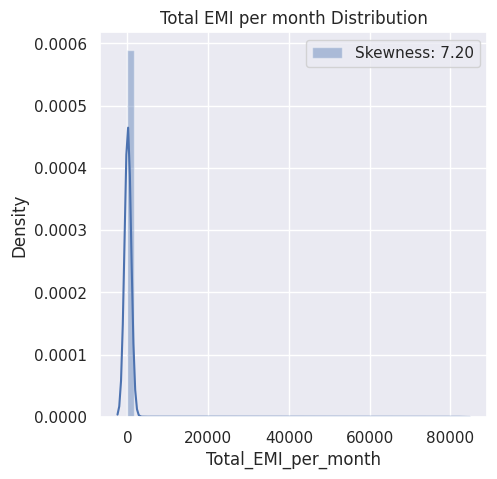

In [178]:
### Understanding the distribution of the column - Total_EMI_per_month

sns.distplot(dataset['Total_EMI_per_month'], label = 'Skewness: %.2f'%(dataset['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')

Text(0.5, 1.0, 'Total EMI per month Distribution')

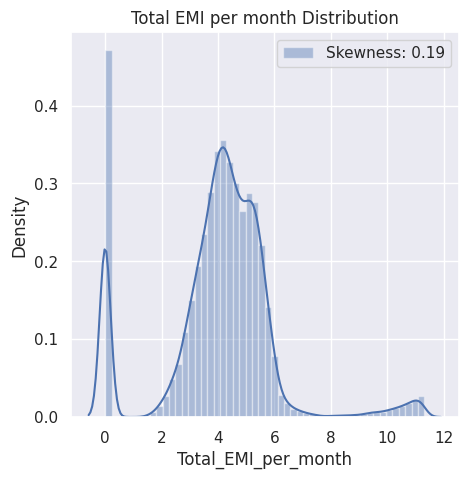

In [179]:
### Understanding the distribution of the data log(Total_EMI_per_month)

modified_emi = [np.log(emi) if emi > 0 else 0 for emi in dataset['Total_EMI_per_month']]
dataset['Total_EMI_per_month'] = modified_emi

sns.distplot(dataset['Total_EMI_per_month'], label = 'Skewness: %.2f'%(dataset['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Total EMI per month Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.4.7 Log Transforming the column - Amount_invested_monthly

Text(0.5, 1.0, 'Amount invested monthly Distribution')

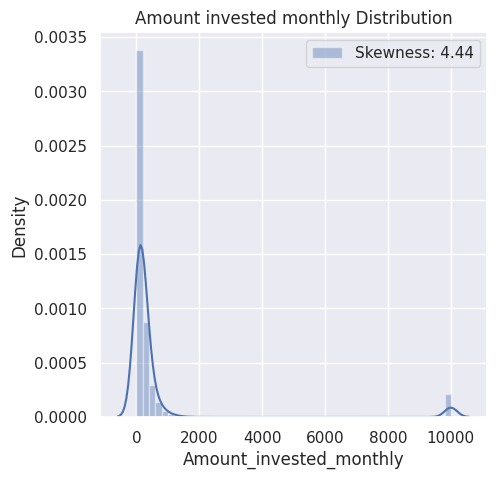

In [180]:
### Understanding the distribution of the column - Amount_invested_monthly

sns.distplot(dataset['Amount_invested_monthly'], label = 'Skewness: %.2f'%(dataset['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')

Text(0.5, 1.0, 'Amount invested monthly Distribution')

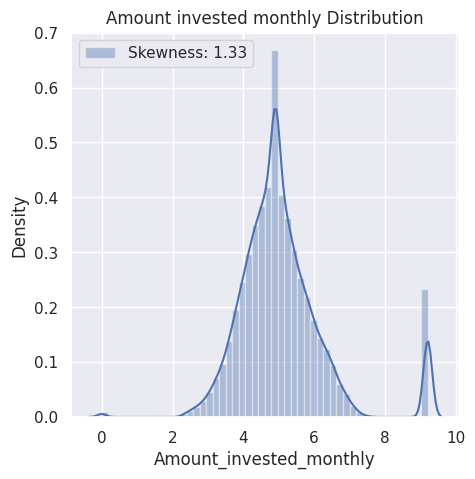

In [181]:
### Understanding the distribution of the data log(Amount_invested_monthly)

modified_amount = [np.log(amount) if amount > 0 else 0 for amount in dataset['Amount_invested_monthly']]
dataset['Amount_invested_monthly'] = modified_amount

sns.distplot(dataset['Amount_invested_monthly'], label = 'Skewness: %.2f'%(dataset['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Amount invested monthly Distribution')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

#### 4.5 Feature Encoding

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

In [182]:
### One Hot Encoding the columns - Month, Occupation, Payment_of_Min_Amount of the dataset

encoded_dataset = pd.get_dummies(data = dataset,
                                       columns = ['Month', 'Occupation', 'Payment_of_Min_Amount'])
encoded_dataset

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,...,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,3.135494,7.509249,1.098612,3,1.945910,11.27,1.386294,809.98,3.903486,4.387204,...,False,False,False,True,False,False,False,False,True,False
1,3.135494,8.590437,1.098612,-1,2.639057,11.27,1.386294,809.98,3.903486,4.773057,...,False,False,False,True,False,False,False,False,True,False
2,0.000000,8.590437,1.098612,3,1.945910,0.00,1.386294,809.98,3.903486,4.403048,...,False,False,False,True,False,False,False,False,True,False
3,3.135494,8.590437,1.098612,5,1.386294,6.27,1.386294,809.98,3.903486,5.295604,...,False,False,False,True,False,False,False,False,True,False
4,3.135494,7.509249,1.098612,6,2.639057,11.27,1.386294,809.98,3.903486,3.723768,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,3.218876,8.119522,1.945910,23,1.945910,11.50,1.098612,502.38,3.558316,4.110404,...,True,False,False,False,False,False,False,False,True,False
99512,3.218876,8.119522,1.945910,18,1.945910,11.50,1.098612,502.38,3.558316,3.992422,...,True,False,False,False,False,False,False,False,True,False
99513,3.218876,8.119522,8.653296,27,1.791759,11.50,1.098612,502.38,3.558316,3.179240,...,True,False,False,False,False,False,False,False,True,False
99514,3.218876,8.119522,1.945910,20,2.639057,11.50,1.098612,502.38,3.558316,5.528129,...,True,False,False,False,False,False,False,False,True,False


In [183]:
### Encoding the Credit Score (Target) column

credit_score_data = encoded_dataset['Credit_Score']
target = []

for each_credit_score in credit_score_data:
    if each_credit_score == 'Good':
        target.append(2)
    elif each_credit_score == 'Standard':
        target.append(1)
    else:
        target.append(0)

### Removing the Credit Score column

encoded_dataset.drop(['Credit_Score'], axis = 1, inplace = True)

### Adding the Target column

encoded_dataset['Target'] = target

In [184]:
### Looking at the dataset

encoded_dataset

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,...,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Target
0,3.135494,7.509249,1.098612,3,1.945910,11.27,1.386294,809.98,3.903486,4.387204,...,False,False,True,False,False,False,False,True,False,2
1,3.135494,8.590437,1.098612,-1,2.639057,11.27,1.386294,809.98,3.903486,4.773057,...,False,False,True,False,False,False,False,True,False,2
2,0.000000,8.590437,1.098612,3,1.945910,0.00,1.386294,809.98,3.903486,4.403048,...,False,False,True,False,False,False,False,True,False,2
3,3.135494,8.590437,1.098612,5,1.386294,6.27,1.386294,809.98,3.903486,5.295604,...,False,False,True,False,False,False,False,True,False,2
4,3.135494,7.509249,1.098612,6,2.639057,11.27,1.386294,809.98,3.903486,3.723768,...,False,False,True,False,False,False,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,3.218876,8.119522,1.945910,23,1.945910,11.50,1.098612,502.38,3.558316,4.110404,...,False,False,False,False,False,False,False,True,False,0
99512,3.218876,8.119522,1.945910,18,1.945910,11.50,1.098612,502.38,3.558316,3.992422,...,False,False,False,False,False,False,False,True,False,0
99513,3.218876,8.119522,8.653296,27,1.791759,11.50,1.098612,502.38,3.558316,3.179240,...,False,False,False,False,False,False,False,True,False,0
99514,3.218876,8.119522,1.945910,20,2.639057,11.50,1.098612,502.38,3.558316,5.528129,...,False,False,False,False,False,False,False,True,False,1


Now our datasets are ready for modelling.

### 5. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Credit Score detection is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out the scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

1. Logistic regression
2. Support vector classification
3. K-nearest neighbours
4. Naive Bayes
5. Decision tree
6. Random forest

Here, we will only be focusing on the data belonging to Good and Poor credit scores.

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

#### 5.1 Splitting the Training Data

Here, we will split the training data into X_train, X_test, Y_train, and Y_test so that they can be fed to the machine learning models that are used in the next section. Then the model with the best performance will be used to predict the result on the given test dataset.

In [185]:
### Splitting the data to the matrices X and Y using the training set.

X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [186]:
### Looking at the new training data - X

X

array([[3.1354942159291497, 7.509249417582862, 1.0986122886681098, ...,
        False, True, False],
       [3.1354942159291497, 8.590437282034781, 1.0986122886681098, ...,
        False, True, False],
       [0.0, 8.590437282034781, 1.0986122886681098, ..., False, True,
        False],
       ...,
       [3.2188758248682006, 8.119522378715017, 8.653296274408579, ...,
        False, True, False],
       [3.2188758248682006, 8.119522378715017, 1.9459101490553132, ...,
        False, True, False],
       [3.2188758248682006, 8.119522378715017, 1.9459101490553132, ...,
        False, True, False]], dtype=object)

In [187]:
### Looking at the new test data - Y

Y

array([2, 2, 2, ..., 0, 1, 0])

In [188]:
### Dividing the dataset into train and test in the ratio of 70 : 30

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 27, shuffle = True)

In [189]:
X_train

array([[3.2188758248682006, 8.601593161649363, 1.9459101490553132, ...,
        False, True, False],
       [3.367295829986474, 8.352033980555339, 2.772588722239781, ...,
        False, False, True],
       [3.258096538021482, 8.870834689105562, 2.1972245773362196, ...,
        False, True, False],
       ...,
       [3.4011973816621555, 8.755068232864707, 3.044522437723423, ...,
        False, False, True],
       [3.6635616461296463, 8.680145876828313, 2.4849066497880004, ...,
        False, False, True],
       [3.295836866004329, 7.852363590024657, 1.6094379124341003, ...,
        False, True, False]], dtype=object)

In [190]:
X_test

array([[3.4011973816621555, 7.797387133099607, 2.70805020110221, ...,
        False, False, True],
       [2.772588722239781, 7.293394592859104, 3.4339872044851463, ...,
        False, False, True],
       [3.367295829986474, 8.757001379785745, 1.0986122886681098, ...,
        False, True, False],
       ...,
       [3.5553480614894135, 8.748397236159981, 2.3978952727983707, ...,
        False, True, False],
       [3.7376696182833684, 8.667491030002255, 1.6094379124341003, ...,
        False, False, True],
       [3.871201010907891, 9.02235882763002, 1.9459101490553132, ...,
        False, True, False]], dtype=object)

In [191]:
Y_train

array([2, 1, 2, ..., 1, 1, 2])

In [192]:
Y_test

array([1, 1, 1, ..., 2, 1, 2])

#### 5.2 Fit Model

In [193]:
### Dictionary to store model and its accuracy

model_accuracy = OrderedDict()

In [194]:
### Dictionary to store model and its precision

model_precision = OrderedDict()

In [195]:
### Dictionary to store model and its recall

model_recall = OrderedDict()

##### 5.2.1 Applying Logistic Regression

In [196]:
### Training the Logistic Regression model on the dataset

logistic_classifier = LogisticRegression(random_state = 27)
logistic_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=27)

In [197]:
### Predicting the Test set results

Y_pred = logistic_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [2 1]
 ...
 [2 2]
 [1 1]
 [1 2]]


In [198]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

logistic_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Logistic Regression'] = logistic_accuracy

logistic_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Logistic Regression'] = logistic_precision

logistic_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Logistic Regression'] = logistic_recall

print('The accuracy of this model is {} %.'.format(logistic_accuracy))
print('The precision of this model is {} %.'.format(logistic_precision))
print('The recall of this model is {} %.'.format(logistic_recall))

[[ 3365  5107   192]
 [ 1833 13064   987]
 [   76  4002  1229]]
The accuracy of this model is 59.15 %.
The precision of this model is 58.94 %.
The recall of this model is 59.15 %.


##### 5.2.2 Applying K-Nearest Neighbors (k = 1)

In [199]:
### Applying 1NN model

classifier_1nn = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_1nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [200]:
### Predicting the Test set results

Y_pred = classifier_1nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [0 1]
 [2 1]
 ...
 [1 2]
 [1 1]
 [2 2]]


In [201]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn1_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['1 - Nearest Neighbors'] = nn1_accuracy

nn1_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['1 - Nearest Neighbors'] = nn1_precision

nn1_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['1 - Nearest Neighbors'] = nn1_recall

print('The accuracy of this model is {} %.'.format(nn1_accuracy))
print('The precision of this model is {} %.'.format(nn1_precision))
print('The recall of this model is {} %.'.format(nn1_recall))

[[ 6409  2151   104]
 [ 2163 12071  1650]
 [  105  1706  3496]]
The accuracy of this model is 73.61 %.
The precision of this model is 73.59 %.
The recall of this model is 73.61 %.


##### 5.2.3 Applying K - Nearest Neighbors (k = 3)

In [202]:
### Applying 3NN model

classifier_3nn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_3nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [203]:
### Predicting the Test set results

Y_pred = classifier_3nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [0 1]
 [2 1]
 ...
 [1 2]
 [1 1]
 [2 2]]


In [204]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn3_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['3 - Nearest Neighbors'] = nn3_accuracy

nn3_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['3 - Nearest Neighbors'] = nn3_precision

nn3_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['3 - Nearest Neighbors'] = nn3_recall

print('The accuracy of this model is {} %.'.format(nn3_accuracy))
print('The precision of this model is {} %.'.format(nn3_precision))
print('The recall of this model is {} %.'.format(nn3_recall))

[[ 6707  1848   109]
 [ 2314 12028  1542]
 [  209  1729  3369]]
The accuracy of this model is 74.04 %.
The precision of this model is 74.03 %.
The recall of this model is 74.04 %.


##### 5.2.4 Applying K - Nearest Neighbors (k = 5)

In [205]:
### Applying 5NN model

classifier_5nn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_5nn.fit(X_train, Y_train)

KNeighborsClassifier()

In [206]:
### Predicting the Test set results

Y_pred = classifier_5nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [2 1]
 ...
 [1 2]
 [1 1]
 [2 2]]


In [207]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn5_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['5 - Nearest Neighbors'] = nn5_accuracy

nn5_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['5 - Nearest Neighbors'] = nn5_precision

nn5_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['5 - Nearest Neighbors'] = nn5_recall

print('The accuracy of this model is {} %.'.format(nn5_accuracy))
print('The precision of this model is {} %.'.format(nn5_precision))
print('The recall of this model is {} %.'.format(nn5_recall))

[[ 6613  1939   112]
 [ 2224 12276  1384]
 [  221  1977  3109]]
The accuracy of this model is 73.68 %.
The precision of this model is 73.52 %.
The recall of this model is 73.68 %.


##### 5.2.5 Applying K - Nearest Neighbors (k = 7)

In [208]:
### Applying 7NN model

classifier_7nn = KNeighborsClassifier(n_neighbors = 7, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_7nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [209]:
### Predicting the Test set results

Y_pred = classifier_7nn.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [2 1]
 ...
 [1 2]
 [1 1]
 [2 2]]


In [210]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn7_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['7 - Nearest Neighbors'] = nn7_accuracy

nn7_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['7 - Nearest Neighbors'] = nn7_precision

nn7_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['7 - Nearest Neighbors'] = nn7_recall

print('The accuracy of this model is {} %.'.format(nn7_accuracy))
print('The precision of this model is {} %.'.format(nn7_precision))
print('The recall of this model is {} %.'.format(nn7_recall))

[[ 6407  2091   166]
 [ 2189 12335  1360]
 [  232  2232  2843]]
The accuracy of this model is 72.3 %.
The precision of this model is 72.03 %.
The recall of this model is 72.3 %.


Now let's plot the accuracies of all the nearest neighbor models. We can see that the accuracy first increases, reaches a peak and then decreases.

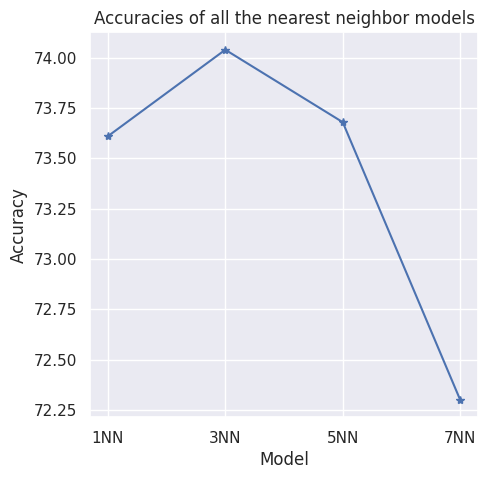

In [211]:
### Looking at the accuracy graph of all the nearest neighbors

labels = ['1NN', '3NN', '5NN', '7NN']
values = [nn1_accuracy, nn3_accuracy, nn5_accuracy, nn7_accuracy]

plt.title('Accuracies of all the nearest neighbor models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.plot(labels, values, '*-')
plt.show()

##### 5.2.6 Applying Gaussian Naive Bayes

In [212]:
### Applying Naive Bayes Classification model

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [213]:
### Predicting the Test set results

Y_pred = naive_bayes_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [0 1]
 [2 1]
 ...
 [2 2]
 [1 1]
 [2 2]]


In [214]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

naive_bayes_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Gaussian Naive Bayes'] = naive_bayes_accuracy

naive_bayes_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Gaussian Naive Bayes'] = naive_bayes_precision

naive_bayes_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Gaussian Naive Bayes'] = naive_bayes_recall

print('The accuracy of this model is {} %.'.format(naive_bayes_accuracy))
print('The precision of this model is {} %.'.format(naive_bayes_precision))
print('The recall of this model is {} %.'.format(naive_bayes_recall))

[[5967 1253 1444]
 [3912 6905 5067]
 [ 226  748 4333]]
The accuracy of this model is 57.63 %.
The precision of this model is 65.49 %.
The recall of this model is 57.63 %.


##### 5.2.7 Applying Decision Tree Classification

In [215]:
### Applying Decision Tree Classification model

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=27)

In [216]:
### Predicting the Test set results

Y_pred = decision_tree_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [2 1]
 ...
 [0 2]
 [1 1]
 [1 2]]


In [217]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

decision_tree_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Decision Tree'] = decision_tree_accuracy

decision_tree_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Decision Tree'] = decision_tree_precision

decision_tree_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Decision Tree'] = decision_tree_recall

print('The accuracy of this model is {} %.'.format(decision_tree_accuracy))
print('The precision of this model is {} %.'.format(decision_tree_precision))
print('The recall of this model is {} %.'.format(decision_tree_recall))

[[ 6178  2281   205]
 [ 2128 12109  1647]
 [  253  1522  3532]]
The accuracy of this model is 73.08 %.
The precision of this model is 73.1 %.
The recall of this model is 73.08 %.


##### 5.2.8 Applying Random Forest Classification (10 trees)

In [218]:
### Applying Random Forest Classification model (10 trees)

random_forest_10_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 27)
random_forest_10_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=27)

In [219]:
### Predicting the Test set results

Y_pred = random_forest_10_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [0 1]
 [2 1]
 ...
 [2 2]
 [1 1]
 [2 2]]


In [220]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_10_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (10 trees)'] = random_forest_10_accuracy

random_forest_10_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (10 trees)'] = random_forest_10_precision

random_forest_10_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (10 trees)'] = random_forest_10_recall

print('The accuracy of this model is {} %.'.format(random_forest_10_accuracy))
print('The precision of this model is {} %.'.format(random_forest_10_precision))
print('The recall of this model is {} %.'.format(random_forest_10_recall))

[[ 6735  1687   242]
 [ 1987 12787  1110]
 [  123  2195  2989]]
The accuracy of this model is 75.4 %.
The precision of this model is 75.15 %.
The recall of this model is 75.4 %.


##### 5.2.9 Applying Random Forest Classification (25 trees)

In [221]:
### Applying Random Forest Classification model (25 trees)

random_forest_25_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 27)
random_forest_25_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=27)

In [222]:
### Predicting the Test set results

Y_pred = random_forest_25_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [0 1]
 [2 1]
 ...
 [2 2]
 [1 1]
 [2 2]]


In [223]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_25_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (25 trees)'] = random_forest_25_accuracy

random_forest_25_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (25 trees)'] = random_forest_25_precision

random_forest_25_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (25 trees)'] = random_forest_25_recall

print('The accuracy of this model is {} %.'.format(random_forest_25_accuracy))
print('The precision of this model is {} %.'.format(random_forest_25_precision))
print('The recall of this model is {} %.'.format(random_forest_25_recall))

[[ 6719  1719   226]
 [ 1702 13125  1057]
 [   60  1899  3348]]
The accuracy of this model is 77.68 %.
The precision of this model is 77.55 %.
The recall of this model is 77.68 %.


##### 5.2.10 Applying Random Forest Classification (50 trees)

In [224]:
### Applying Random Forest Classification model (50 trees)

random_forest_50_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 27)
random_forest_50_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=27)

In [225]:
### Predicting the Test set results

Y_pred = random_forest_50_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [0 1]
 [2 1]
 ...
 [2 2]
 [1 1]
 [1 2]]


In [226]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_50_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (50 trees)'] = random_forest_50_accuracy

random_forest_50_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (50 trees)'] = random_forest_50_precision

random_forest_50_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (50 trees)'] = random_forest_50_recall

print('The accuracy of this model is {} %.'.format(random_forest_50_accuracy))
print('The precision of this model is {} %.'.format(random_forest_50_precision))
print('The recall of this model is {} %.'.format(random_forest_50_recall))

[[ 6804  1653   207]
 [ 1622 13241  1021]
 [   36  1800  3471]]
The accuracy of this model is 78.77 %.
The precision of this model is 78.66 %.
The recall of this model is 78.77 %.


##### 5.2.11 Applying Random Forest Classification (100 trees)

In [227]:
### Applying Random Forest Classification model (100 trees)

random_forest_100_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 27)
random_forest_100_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=27)

In [228]:
### Predicting the Test set results

Y_pred = random_forest_100_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [0 1]
 [2 1]
 ...
 [2 2]
 [1 1]
 [1 2]]


In [229]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_100_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (100 trees)'] = random_forest_100_accuracy

random_forest_100_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (100 trees)'] = random_forest_100_precision

random_forest_100_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (100 trees)'] = random_forest_100_recall

print('The accuracy of this model is {} %.'.format(random_forest_100_accuracy))
print('The precision of this model is {} %.'.format(random_forest_100_precision))
print('The recall of this model is {} %.'.format(random_forest_100_recall))

[[ 6806  1660   198]
 [ 1555 13323  1006]
 [   32  1730  3545]]
The accuracy of this model is 79.3 %.
The precision of this model is 79.21 %.
The recall of this model is 79.3 %.


##### 5.2.12 Applying Stacking Classifier

In [230]:
### Preparing the Stacking Classifier

### Define the base models

base_models = list()

base_models.append(('3nn', classifier_3nn))
base_models.append(('decision_tree', decision_tree_classifier))
base_models.append(('random_forest_100', random_forest_100_classifier))

### Define the meta models

meta_model = logistic_classifier

In [231]:
### Applying Stacking Classification

stacking_classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model)
stacking_classifier.fit(X_train, Y_train)

StackingClassifier(estimators=[('3nn', KNeighborsClassifier(n_neighbors=3)),
                               ('decision_tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       random_state=27)),
                               ('random_forest_100',
                                RandomForestClassifier(criterion='entropy',
                                                       random_state=27))],
                   final_estimator=LogisticRegression(random_state=27))

In [232]:
### Predicting the Test set results

Y_pred = stacking_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [0 1]
 [2 1]
 ...
 [2 2]
 [1 1]
 [2 2]]


In [233]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

stacking_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Stacking Classification'] = stacking_accuracy

stacking_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Stacking Classification'] = stacking_precision

stacking_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Stacking Classification'] = stacking_recall

print('The accuracy of this model is {} %.'.format(stacking_accuracy))
print('The precision of this model is {} %.'.format(stacking_precision))
print('The recall of this model is {} %.'.format(stacking_recall))

[[ 7017  1594    53]
 [ 1514 13291  1079]
 [   21  1407  3879]]
The accuracy of this model is 81.01 %.
The precision of this model is 80.98 %.
The recall of this model is 81.01 %.


##### 5.2.13 Applying Soft Voting Classifier

In [234]:
### Preparing the Soft Voting Classifier

### Creating the list of estimators

estimators = list()

estimators.append(('3nn', classifier_3nn))
estimators.append(('decision_tree', decision_tree_classifier))
estimators.append(('random_forest_100', random_forest_100_classifier))

In [235]:
### Applying Soft Voting Classification

soft_voting_classifier = VotingClassifier(estimators = estimators, voting = 'soft')
soft_voting_classifier.fit(X_train, Y_train)

VotingClassifier(estimators=[('3nn', KNeighborsClassifier(n_neighbors=3)),
                             ('decision_tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=27)),
                             ('random_forest_100',
                              RandomForestClassifier(criterion='entropy',
                                                     random_state=27))],
                 voting='soft')

In [236]:
### Predicting the Test set results

Y_pred = soft_voting_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[1 1]
 [1 1]
 [2 1]
 ...
 [0 2]
 [1 1]
 [1 2]]


In [237]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

soft_voting_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Soft Voting'] = soft_voting_accuracy

soft_voting_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Soft Voting'] = soft_voting_precision

soft_voting_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Soft Voting'] = soft_voting_recall

print('The accuracy of this model is {} %.'.format(soft_voting_accuracy))
print('The precision of this model is {} %.'.format(soft_voting_precision))
print('The recall of this model is {} %.'.format(soft_voting_recall))

[[ 6718  1824   122]
 [ 1653 13064  1167]
 [   99  1516  3692]]
The accuracy of this model is 78.63 %.
The precision of this model is 78.56 %.
The recall of this model is 78.63 %.


#### 5.3 Model evaluation

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

##### 5.3.1 Training accuracy of the models

Now we will tabulate all the models along with their accuracies. This data is stored in the model_performance dictionary. We will use the tabulate package for tabulating the results.

In [238]:
### Looking at the model accuracy dictionary

model_accuracy

OrderedDict([('Logistic Regression', 59.15),
             ('1 - Nearest Neighbors', 73.61),
             ('3 - Nearest Neighbors', 74.04),
             ('5 - Nearest Neighbors', 73.68),
             ('7 - Nearest Neighbors', 72.3),
             ('Gaussian Naive Bayes', 57.63),
             ('Decision Tree', 73.08),
             ('Random Forest (10 trees)', 75.4),
             ('Random Forest (25 trees)', 77.68),
             ('Random Forest (50 trees)', 78.77),
             ('Random Forest (100 trees)', 79.3),
             ('Stacking Classification', 81.01),
             ('Soft Voting', 78.63)])

In [239]:
### Looking at the model precision dictionary

model_precision

OrderedDict([('Logistic Regression', 58.94),
             ('1 - Nearest Neighbors', 73.59),
             ('3 - Nearest Neighbors', 74.03),
             ('5 - Nearest Neighbors', 73.52),
             ('7 - Nearest Neighbors', 72.03),
             ('Gaussian Naive Bayes', 65.49),
             ('Decision Tree', 73.1),
             ('Random Forest (10 trees)', 75.15),
             ('Random Forest (25 trees)', 77.55),
             ('Random Forest (50 trees)', 78.66),
             ('Random Forest (100 trees)', 79.21),
             ('Stacking Classification', 80.98),
             ('Soft Voting', 78.56)])

In [240]:
### Looking at the model recall dictionary

model_recall

OrderedDict([('Logistic Regression', 59.15),
             ('1 - Nearest Neighbors', 73.61),
             ('3 - Nearest Neighbors', 74.04),
             ('5 - Nearest Neighbors', 73.68),
             ('7 - Nearest Neighbors', 72.3),
             ('Gaussian Naive Bayes', 57.63),
             ('Decision Tree', 73.08),
             ('Random Forest (10 trees)', 75.4),
             ('Random Forest (25 trees)', 77.68),
             ('Random Forest (50 trees)', 78.77),
             ('Random Forest (100 trees)', 79.3),
             ('Stacking Classification', 81.01),
             ('Soft Voting', 78.63)])

In [241]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Model Accuracy', 'Model Precision', 'Model Recall'])
count = 1

for model in model_accuracy:
    row = [count, model, model_accuracy[model], model_precision[model], model_recall[model]]
    table.append(row)
    count += 1

print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════╤══════════════════╤═══════════════════╤════════════════╕
│   S.No. │ Classification Model      │   Model Accuracy │   Model Precision │   Model Recall │
╞═════════╪═══════════════════════════╪══════════════════╪═══════════════════╪════════════════╡
│       1 │ Logistic Regression       │            59.15 │             58.94 │          59.15 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       2 │ 1 - Nearest Neighbors     │            73.61 │             73.59 │          73.61 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       3 │ 3 - Nearest Neighbors     │            74.04 │             74.03 │          74.04 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       4 │ 5 - Nearest Neighbors     │            73.68 │             73.52 │          73.68 │
├─────────┼───────────────────────────┼─

From the above table, we can see that Stacking Classifier has the highest model accuracy of 81.02% among all the other models. It also has the highest precision and recall with 80.98% and 81.02%.

### 6. Conclusion

Hence our recommended model - Stacking Classifier provides a model accuracy of 81.02 percent, a model precision of 80.98 percent, and a model recall of 81.02 percent.